In [8]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

In [10]:
# Getting the data
product_data= pd.read_csv('Dataset/PRODUCT_data.csv')
product_batch_data= pd.read_csv('Dataset/PRODUCT_BATCH_data.csv')
transaction_data= pd.read_csv('Dataset/TRANSACTION_data.csv')

In [40]:
transaction_data.rename(columns={'id': 'transaction_id'}, inplace=True)

In [3]:
# **1. Most Popular Products:**

most_bought_product = transaction_product_combined_1a_11a.groupby('product_id')['qty'].sum().sort_values(ascending=False).index[0]
most_bought_product_name = product_data[product_data['id'] == most_bought_product]['name'].values[0]
print(f"Most bought product: {most_bought_product_name}")

Most bought product: FACTOM FOS


In [4]:
# **2. Most Popular Products by Store:

most_bought_products = transaction_product_combined_1a_11a.groupby(['Store_outlet_id', 'product_id']).size().unstack().idxmax(axis=1)

for store_id, most_bought_product in most_bought_products.items():
    product_name = product_data[product_data['id'] == most_bought_product]['name'].values[0]
    print(f"Most bought product in store {store_id}: {product_name}")

Most bought product in store 0: Tomato
Most bought product in store 2: PAMPERS 
Most bought product in store 4: SUGAR
Most bought product in store 6: Barshan'' test Products
Most bought product in store 9: Chappathi
Most bought product in store 11: Tea Glass 7g
Most bought product in store 13: SUGAR
Most bought product in store 17: GROW BAG (40x24x24)
Most bought product in store 18: SLEEVE
Most bought product in store 22: SUGAR
Most bought product in store 23: SHIRTING BOMBAY DYING
Most bought product in store 25: SUGAR
Most bought product in store 27: Horlicks
Most bought product in store 29: ZEN PET 100ML JAR
Most bought product in store 32: Kuthari
Most bought product in store 33: 18.09.18
Most bought product in store 35: UREA T
Most bought product in store 37: SUGAR BAG
Most bought product in store 41: RICE VADI
Most bought product in store 45: SUGER 1KG LOOS
Most bought product in store 46: Tomato
Most bought product in store 47: Ruchi Gold Palmolein 1 L
Most bought product in st

In [5]:
# **3. Average transaction value by store

average_transaction_value_by_store = transaction_data.groupby('store_outlet_id')['net_amount'].mean()

# Print the average transaction value for each store
print("Average Transaction Value by Store:")
for store_id, average_value in average_transaction_value_by_store.items():
    print(f"Store ID: {store_id}, Average Transaction Value: {average_value:.2f}")


Average Transaction Value by Store:
Store ID: 2, Average Transaction Value: 700.45
Store ID: 4, Average Transaction Value: 1323.82
Store ID: 6, Average Transaction Value: -35983120.49
Store ID: 9, Average Transaction Value: 247.33
Store ID: 11, Average Transaction Value: 1208.96
Store ID: 13, Average Transaction Value: 1117.62
Store ID: 17, Average Transaction Value: 3215.72
Store ID: 18, Average Transaction Value: 21846.51
Store ID: 22, Average Transaction Value: 1058.31
Store ID: 23, Average Transaction Value: 2287.45
Store ID: 25, Average Transaction Value: 5456.79
Store ID: 27, Average Transaction Value: 849.20
Store ID: 29, Average Transaction Value: 25799.21
Store ID: 32, Average Transaction Value: 1671.53
Store ID: 33, Average Transaction Value: 11197.18
Store ID: 35, Average Transaction Value: 9820.84
Store ID: 37, Average Transaction Value: 650.22
Store ID: 41, Average Transaction Value: 2330.48
Store ID: 45, Average Transaction Value: 1800.80
Store ID: 46, Average Transaction

In [7]:
# **4. Top stores with Repeat Customers 

repeat_customers = transaction_data[transaction_data['customer_id'].duplicated()]
repeat_customers_by_store = repeat_customers.groupby('store_outlet_id')['customer_id'].count().sort_values(ascending=False)
top_stores_repeat_customers = repeat_customers_by_store.head(10)
print("Top 10 Stores with Repeat Customers:")
for store_id, count in top_stores_repeat_customers.items():
    print(f"- Store ID: {store_id}, Repeat Customers: {count}")


Top 10 Stores with Repeat Customers:
- Store ID: 9, Repeat Customers: 120429
- Store ID: 46, Repeat Customers: 75207
- Store ID: 4, Repeat Customers: 14073
- Store ID: 51, Repeat Customers: 2954
- Store ID: 45, Repeat Customers: 2222
- Store ID: 49, Repeat Customers: 1859
- Store ID: 105, Repeat Customers: 1779
- Store ID: 25, Repeat Customers: 1393
- Store ID: 70, Repeat Customers: 403
- Store ID: 128, Repeat Customers: 304


In [8]:
# **5. top 10 Popular Product Categories

most_popular_product_categories = product_data.groupby('product_type_id')['id'].count().sort_values(ascending=False).head(10)

for category_id, count in most_popular_product_categories.items():
    category_name = product_data[product_data['product_type_id'] == category_id]['name'].values[0]
    print(f"- {category_name}: {count}")


- PD LBR SFT 10 2018: 19888
- PD LBR SFT 10 2018: 19874
- F709 BLK NDM 10 TPR: 15301
- PD LBR SFT 10 2018: 14898
- LIA BATHYRS20: 13303
- COCOUNT OIL NAYAN 500 ML: 5494
- Winkin Kesar Milk: 4682
- SNIKERS 10: 3757
- CHE 1102 BR OIL NBK 8 PU: 3328
- CHE 1100 DBR NBK 9 PU: 3323


In [9]:
# **6 Year wise Peak Sales Periods 

# Convert the transaction date to a datetime object
transaction_data['transaction_date'] = pd.to_datetime(transaction_data['transaction_date'])

# Group the data by year and month, and calculate the sum of the total amount for each month
monthly_sales = transaction_data.groupby([transaction_data['transaction_date'].dt.year, transaction_data['transaction_date'].dt.month])['net_amount'].sum()

# Get the month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Create a dictionary to store the peak sales periods for each year
peak_sales_by_year = {}

# Iterate through each year and find the month with the highest sales
for year in monthly_sales.index.get_level_values(0).unique():
    peak_month = monthly_sales[year].idxmax()
    peak_sales_by_year[year] = f"{month_names[peak_month]} {year}"

# Print the peak sales periods for each year
print("Peak Sales Periods by Year:")
for year, peak_month in peak_sales_by_year.items():
    print(f"- {year}: {peak_month}")


Peak Sales Periods by Year:
- 2019: December 2019
- 2020: November 2020
- 2021: November 2021
- 2022: April 2022
- 2023: November 2023
- 2024: February 2024


In [20]:
# **7. Customer Spending Habits:**

customer_spending = transaction_data.groupby('customer_id')['net_amount'].sum().sort_values(ascending=False)
print("Top 10 highest spending customers:")
for customer_id, amount in customer_spending.head(10).items():
    print(f"- Customer ID: {customer_id}, Total spent: {amount}")

Top 10 highest spending customers:
- Customer ID: 816, Total spent: 24099965.94
- Customer ID: 1145, Total spent: 23854219.47
- Customer ID: 304, Total spent: 23334882.4
- Customer ID: 1541, Total spent: 23309587.68
- Customer ID: 164, Total spent: 11067208.91
- Customer ID: 753, Total spent: 10144696.32
- Customer ID: 939, Total spent: 8687560.07
- Customer ID: 315, Total spent: 8661423.19
- Customer ID: 736, Total spent: 7993696.85
- Customer ID: 1790, Total spent: 7868256.22


In [ ]:

# **8. Product Recommendations:**

# - Recommend products frequently bought together using association rule learning.
# - Recommend similar products based on customer preferences.

# **9. Sales Forecasting:**

# - Use time series analysis to forecast future sales trends.
# - Use regression analysis to predict sales based on factors like product price, discounts, and promotions.

# **10. Customer Segmentation:**

# - Use clustering techniques to segment customers based on their spending habits and preferences.
# - Develop targeted marketing campaigns for each customer segment.

In [4]:
# prompt: change column name from id to product_id of product_data

product_data.rename(columns={'id': 'product_id'}, inplace=True)
product_data.head()

,product_id,unit_id,name,short_name,print_name,image,product_type_id,product_measurement_unit_id,product_manufacture_id,product_brand_id,...,is_enable_weighing_machine,wbp_code,wbp_sales_price,is_enable_shopping_cart,is_share_with,is_share_main,is_share_childs,share_with,share_main_unit_id,share_product_id
0,192686,19,6MM PIPE TUBE,S969,6MM PIPE TUBE,NaN,218,29,1403.0,NaN,...,False,NaN,NaN,False,False,False,False,NaN,NaN,NaN
1,192687,19,"60""SINGLE bottam",S1873,"60""SINGLE bottam",NaN,218,26,1403.0,NaN,...,False,NaN,NaN,False,False,False,False,NaN,NaN,NaN
2,192688,19,"60"" SINGLE TOP",S1872,"60"" SINGLE TOP",NaN,192,26,1403.0,NaN,...,False,NaN,NaN,False,False,False,False,NaN,NaN,NaN
3,192689,63,NEELAMBARI POWDER,NEELAMBARI P,NEELAMBARI POWDER,NaN,1043,140,1028.0,NaN,...,False,NaN,NaN,False,False,False,False,NaN,NaN,NaN
4,192690,19,"6 1/4 FT FEEDER (75"" )",S1897,"6 1/4 FT FEEDER (75"" )",NaN,192,26,1403.0,NaN,...,False,NaN,NaN,False,False,False,False,NaN,NaN,NaN


In [5]:
# **7 Product reccomendation

# Merge the transaction and product data
merged_data = pd.merge(transaction_product_combined_1a_11a, product_data, on='product_id')

# Group the data by customer ID and product ID, and calculate the number of purchases
purchase_counts = merged_data.groupby(['customer_id', 'product_id'])['total_amount'].count().unstack()

# Find the most popular products for each customer
most_popular_products = purchase_counts.idxmax(axis=1)

# Create a dictionary to store the recommended products for each customer
recommended_products = {}

# Iterate through each customer and get their recommended products
for customer_id, most_popular_product in most_popular_products.items():
    recommended_products[customer_id] = product_data[product_data['product_id'] == most_popular_product]['name'].values[0]

# Create a new dataframe with customer_id and product_name
recommended_products_df = pd.DataFrame({
    'customer_id': list(recommended_products.keys()),
    'product_name': list(recommended_products.values())
})

# Display the recommended products for each customer
print(recommended_products_df.head())

   customer_id     product_name
0          0.0           Tomato
1          1.0        Chappathi
2          2.0       PEARS SOAP
3          3.0  Milma Hom Milk 
4          4.0        Chappathi


In [60]:

# **8. Average transaction value by store

def average_transaction_value_by_store(transaction_data):
    average_transaction_value_by_store = transaction_data.groupby('store_outlet_id')['net_amount'].mean()

    # Print the average transaction value for each store
    print("Average Transaction Value by Store:")
    for store_id, average_value in average_transaction_value_by_store.items():
        print(f"Store ID: {store_id}, Average Transaction Value: {average_value:.2f}")

    # Create three subplots
    fig, axes = plt.subplots(3, 1, figsize=(15, 13))

    # Plot the average transaction value for each store in the first subplot
    sns.barplot(x=average_transaction_value_by_store.index[:25], y=average_transaction_value_by_store.values[:25], ax=axes[0])
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].set_title('Average Transaction Value by Store')
    for i, val in enumerate(average_transaction_value_by_store.values[:25]):
        axes[0].text(i, val, f'{val:.2f}', ha='center', va='bottom')

    # Plot the average transaction value for each store in the second subplot
    sns.barplot(x=average_transaction_value_by_store.index[25:50], y=average_transaction_value_by_store.values[25:50], ax=axes[1])
    axes[1].tick_params(axis='x', rotation=90)
    axes[1].set_title('Average Transaction Value by Store')
    for i, val in enumerate(average_transaction_value_by_store.values[25:50]):
        axes[1].text(i, val, f'{val:.2f}', ha='center', va='bottom')

    # Plot the average transaction value for each store in the third subplot
    sns.barplot(x=average_transaction_value_by_store.index[50:], y=average_transaction_value_by_store.values[50:], ax=axes[2])
    axes[2].tick_params(axis='x', rotation=90)
    axes[2].set_title('Average Transaction Value by Store')
    for i, val in enumerate(average_transaction_value_by_store.values[50:]):
        axes[2].text(i, val, f'{val:.2f}', ha='center', va='bottom')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

Average Transaction Value by Store:
Store ID: 2, Average Transaction Value: 700.53
Store ID: 4, Average Transaction Value: 1324.53
Store ID: 6, Average Transaction Value: 14297.30
Store ID: 9, Average Transaction Value: 248.14
Store ID: 11, Average Transaction Value: 1265.94
Store ID: 13, Average Transaction Value: 1118.34
Store ID: 17, Average Transaction Value: 3216.07
Store ID: 18, Average Transaction Value: 21846.51
Store ID: 22, Average Transaction Value: 1058.31
Store ID: 23, Average Transaction Value: 2287.57
Store ID: 25, Average Transaction Value: 5500.94
Store ID: 27, Average Transaction Value: 849.20
Store ID: 29, Average Transaction Value: 25799.21
Store ID: 32, Average Transaction Value: 1671.53
Store ID: 33, Average Transaction Value: 11197.18
Store ID: 35, Average Transaction Value: 9820.84
Store ID: 37, Average Transaction Value: 652.15
Store ID: 41, Average Transaction Value: 2333.26
Store ID: 45, Average Transaction Value: 1802.04
Store ID: 46, Average Transaction Val

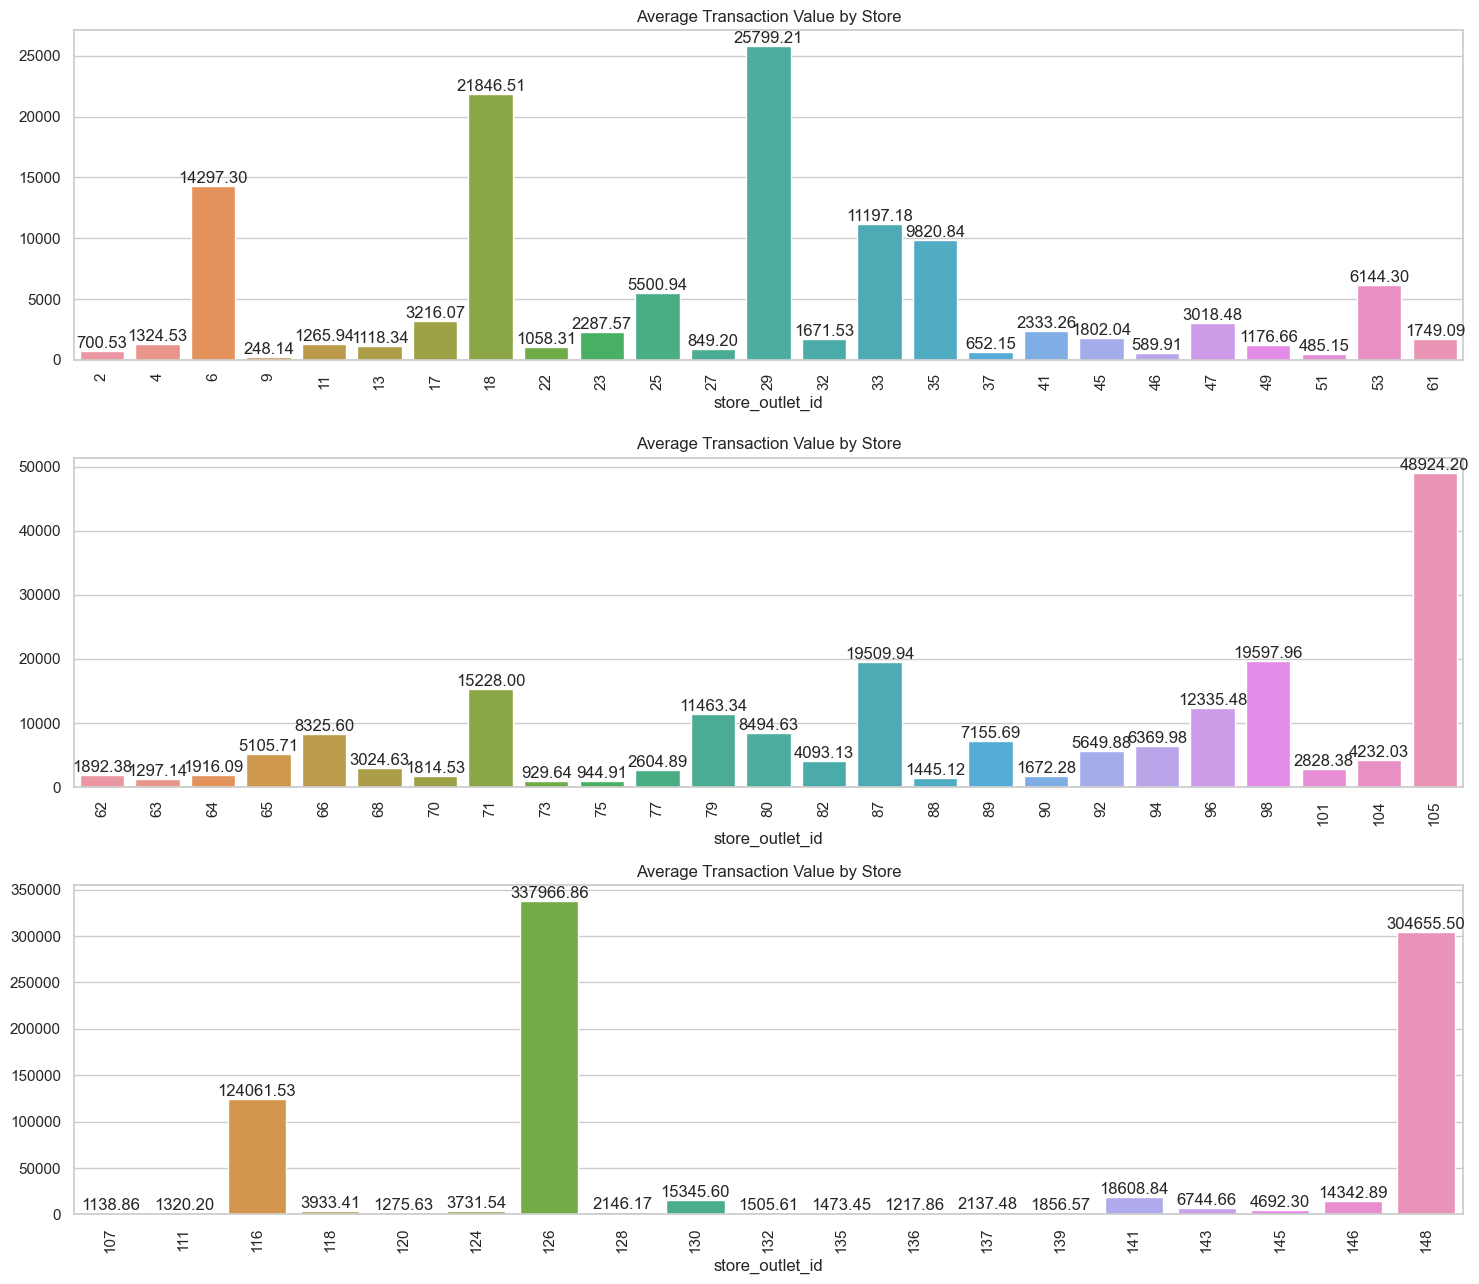

In [62]:

average_transaction_value_by_store(transaction_data)

In [8]:
# **9.  Top stores with number of Repeat Customers

def top_store_with_repeat_customer(transaction_data):
    # Calculate repeat customers for each store
    repeat_customers_by_store = transaction_data.groupby('store_outlet_id')['customer_id'].nunique()

    # Sort by number of repeat customers in descending order
    top_stores_by_repeat_customers = repeat_customers_by_store.sort_values(ascending=False)

    # Print the top 10 stores with the most repeat customers
    print("Top 10 Stores with Most Repeat Customers:")
    for store_id, num_repeat_customers in top_stores_by_repeat_customers.head(10).items():
        print(f"Store ID: {store_id}, Repeat Customers: {num_repeat_customers}")

    # Prepare data
    store_ids = top_stores_by_repeat_customers[:10].index.to_list()
    repeat_counts = top_stores_by_repeat_customers[:10].values.tolist()

    # Convert store IDs to strings
    store_ids = [str(store_id) for store_id in store_ids]

    # Set the style and color palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("viridis", len(store_ids))

    # Create bar chart
    plt.figure(figsize=(12, 6))
    bars = plt.bar(store_ids, repeat_counts, color=palette)

    # Add labels and title with improved font size and weight
    plt.xlabel("Store ID", fontsize=14, weight='bold')
    plt.ylabel("Number of Repeat Customers", fontsize=14, weight='bold')
    plt.title("Top Stores with Most Repeat Customers", fontsize=16, weight='bold')

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add data labels with background color for better readability
    for bar, count in zip(bars, repeat_counts):
        plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom', fontsize=12, backgroundcolor='white')

    # Display the plot
    plt.tight_layout()
plt.show()



Average Transaction Value by Store:
Store ID: 2, Average Transaction Value: 700.53
Store ID: 4, Average Transaction Value: 1324.53
Store ID: 6, Average Transaction Value: 14297.30
Store ID: 9, Average Transaction Value: 248.14
Store ID: 11, Average Transaction Value: 1265.94
Store ID: 13, Average Transaction Value: 1118.34
Store ID: 17, Average Transaction Value: 3216.07
Store ID: 18, Average Transaction Value: 21846.51
Store ID: 22, Average Transaction Value: 1058.31
Store ID: 23, Average Transaction Value: 2287.57
Store ID: 25, Average Transaction Value: 5500.94
Store ID: 27, Average Transaction Value: 849.20
Store ID: 29, Average Transaction Value: 25799.21
Store ID: 32, Average Transaction Value: 1671.53
Store ID: 33, Average Transaction Value: 11197.18
Store ID: 35, Average Transaction Value: 9820.84
Store ID: 37, Average Transaction Value: 652.15
Store ID: 41, Average Transaction Value: 2333.26
Store ID: 45, Average Transaction Value: 1802.04
Store ID: 46, Average Transaction Val

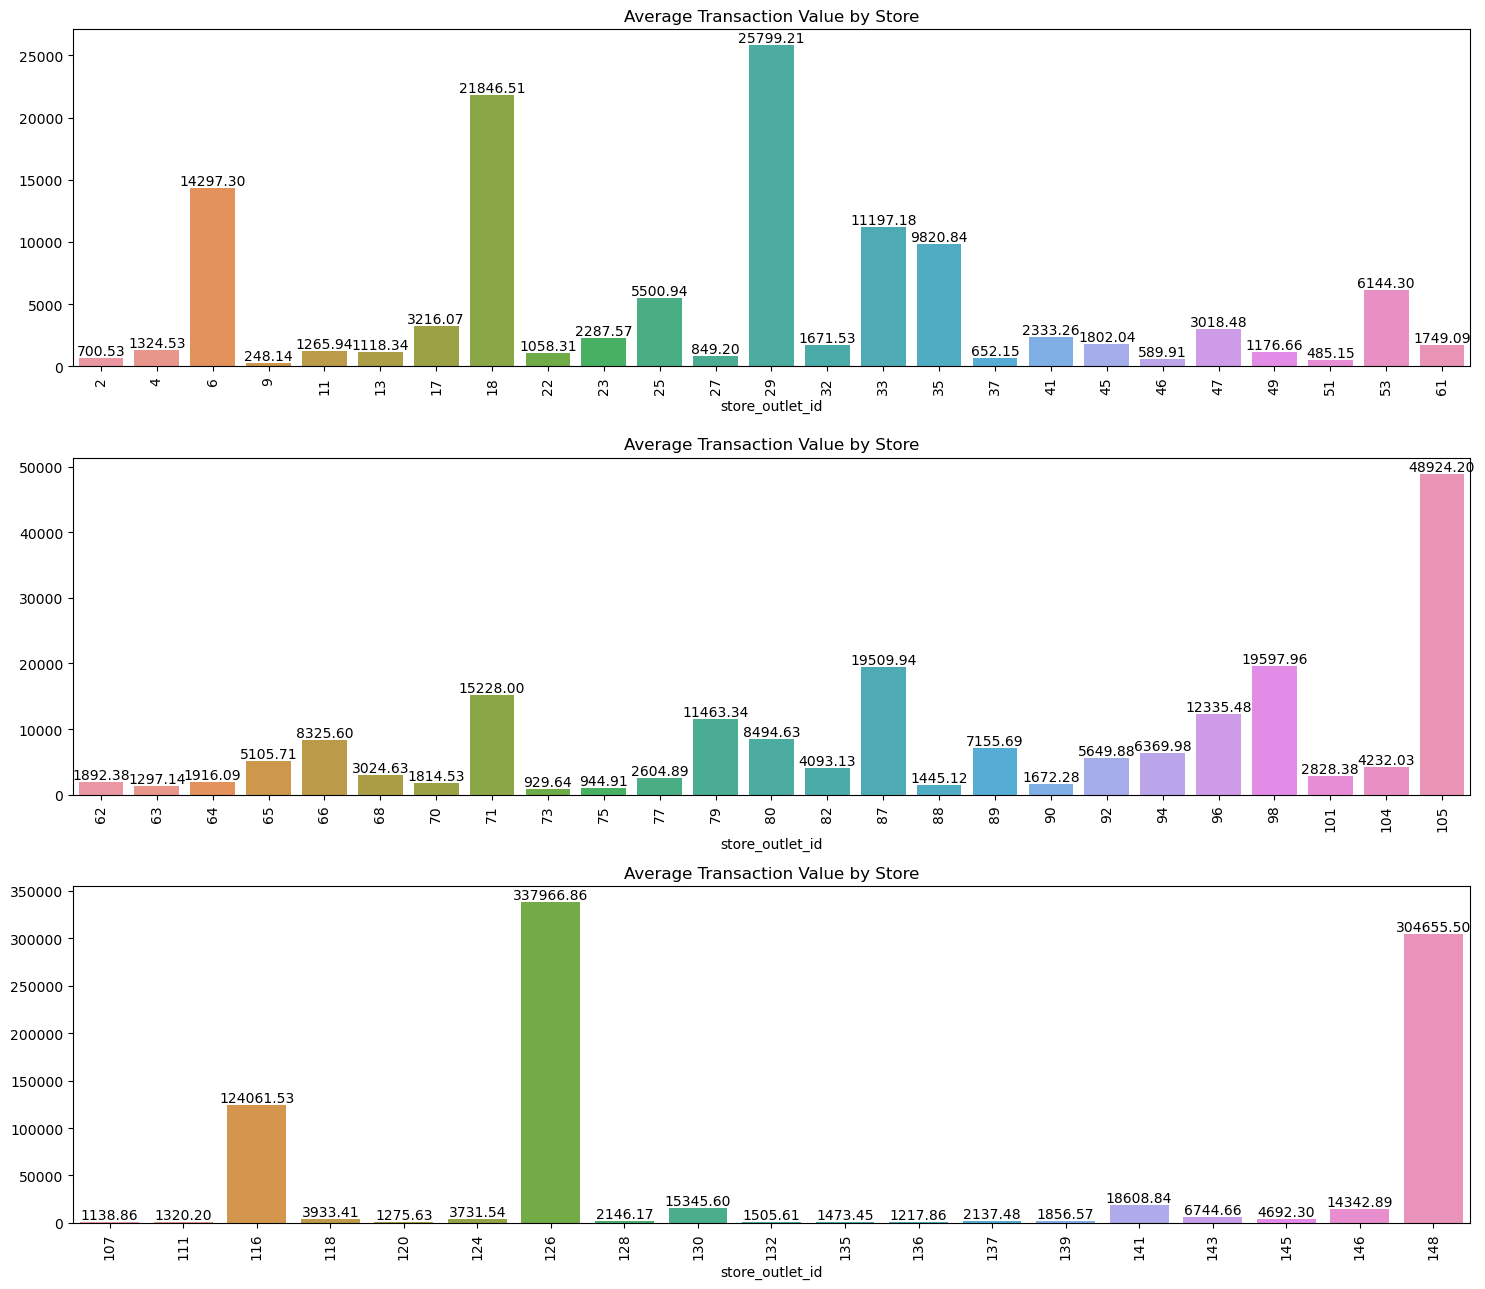

Top 10 Stores with Most Repeat Customers:
Store ID: 46, Repeat Customers: 2340
Store ID: 101, Repeat Customers: 1186
Store ID: 9, Repeat Customers: 784
Store ID: 4, Repeat Customers: 677
Store ID: 45, Repeat Customers: 200
Store ID: 70, Repeat Customers: 191
Store ID: 128, Repeat Customers: 178
Store ID: 49, Repeat Customers: 152
Store ID: 11, Repeat Customers: 140
Store ID: 104, Repeat Customers: 60


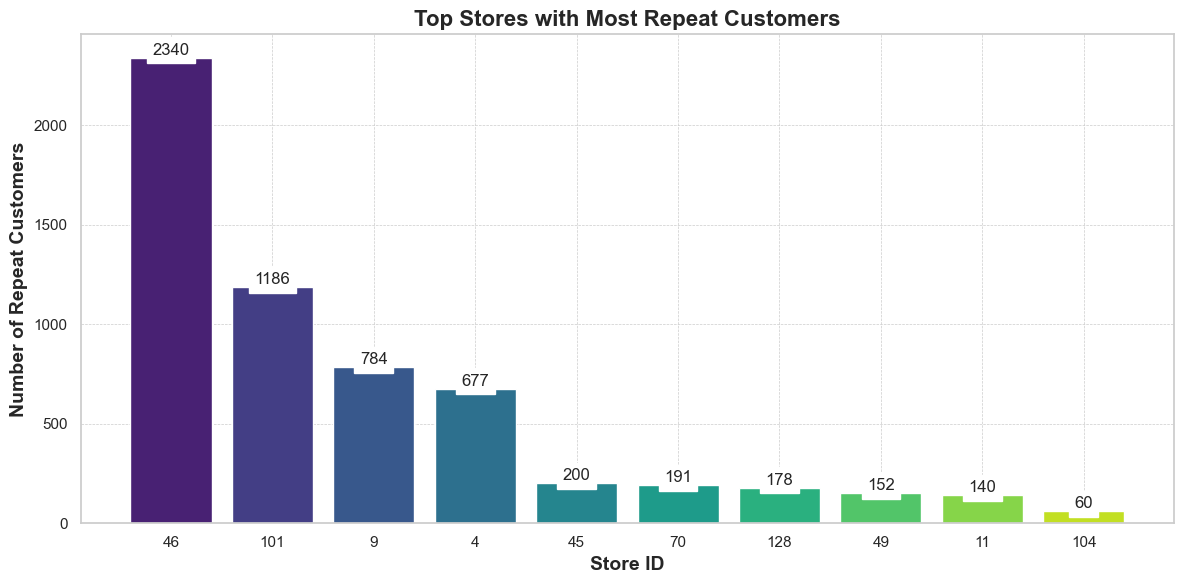

In [9]:
from Function import top_store_with_repeat_customer
top_store_with_repeat_customer(transaction_data)

In [9]:
# **10. Product which has high demand by store

high_demand_products_by_store = transaction_product_combined_1a_11a.groupby(['Store_outlet_id', 'product_id'])['qty'].sum().unstack().idxmax(axis=1)

for store_id, product_id in high_demand_products_by_store.items():
    product_name = product_data[product_data['product_id'] == product_id]['name'].values[0]
    quantity = transaction_product_combined_1a_11a[(transaction_product_combined_1a_11a['Store_outlet_id'] == store_id) & (transaction_product_combined_1a_11a['product_id'] == product_id)]['qty'].sum()
    print(f"Store ID: {store_id}, Product Name: {product_name}, Quantity Sold: {quantity}")


Store ID: 0, Product Name: LIME, Quantity Sold: 597774.0
Store ID: 2, Product Name: PAMPERS , Quantity Sold: 14179.0
Store ID: 4, Product Name: CHOCOLATE RS.5/ Rs. 5, Quantity Sold: 36322.0
Store ID: 6, Product Name: Surgical Mask (Blue), Quantity Sold: 20058.0
Store ID: 9, Product Name: Tea, Quantity Sold: 106602.0
Store ID: 11, Product Name: Tea Glass 7g, Quantity Sold: 7715.0
Store ID: 13, Product Name: EGG, Quantity Sold: 261821.0
Store ID: 17, Product Name: GROW BAG (40x24x24), Quantity Sold: 76229.0
Store ID: 18, Product Name: SLEEVE, Quantity Sold: 1432.0
Store ID: 22, Product Name: SUGAR, Quantity Sold: 87231.728
Store ID: 23, Product Name: SHIRTING BOMBAY DYING, Quantity Sold: 18886.294
Store ID: 25, Product Name: SUGAR, Quantity Sold: 152858.72
Store ID: 27, Product Name: Raw material 1, Quantity Sold: 300.0
Store ID: 29, Product Name: STICK WOOD, Quantity Sold: 50.0
Store ID: 32, Product Name: Kuthari, Quantity Sold: 48177.8
Store ID: 33, Product Name: 18.09.18, Quantity Sol

In [10]:
# *11. Product which are bought very less in each store

# Calculate the sum of quantities sold for each product in each store
product_sales_by_store = transaction_product_combined_1a_11a.groupby(['Store_outlet_id', 'product_id'])['qty'].sum().unstack()

# Find the products with the lowest sales in each store
least_sold_products_by_store = product_sales_by_store.idxmin(axis=1)

# Print the least sold products for each store
for store_id, product_id in least_sold_products_by_store.items():
    product_name = product_data[product_data['product_id'] == product_id]['name'].values[0]
    print(f"Least sold product in store {store_id}: {product_name}")


Least sold product in store 0: PAVAKKA VALA 15 PLY ORDINARY
Least sold product in store 2: AMORA POPEES
Least sold product in store 4: 2349 BALL LED Rs. 200
Least sold product in store 6: Borborn
Least sold product in store 9: Veg Kuruma
Least sold product in store 11: SB T Bulb 10W
Least sold product in store 13: AJINOMOTO
Least sold product in store 17: MAXO GOAT MANURE 2KG(B)
Least sold product in store 18: AGRIMATE BALERO MIST BLOWER AM 400
Least sold product in store 22: KERA OIL
Least sold product in store 23:  MONO SILVER
Least sold product in store 25: TIDE RED DETERGENT POWDER 500GM
Least sold product in store 27: Ponni Rice 10KG
Least sold product in store 29: CHOOL LOVLY 7GROYAL
Least sold product in store 32: COMFRORT BLUE BOTTLE 430.ML
Least sold product in store 33: BONE MEAL 10 KG
Least sold product in store 35: COCO PEAT 5%
Least sold product in store 37: UJALA CRISP AND SHINE FLORAL F
Least sold product in store 41: ALAVANKU
Least sold product in store 45: BET WHEAT 1K

In [ ]:

# **12. Products which had high demand in specific time period by store

def product_with_high_demand_in_specific_time_period(transaction_product_data, store_id, product_data):
    # Filter the data for the desired time period and store
    transaction_product_data['transaction_date'] = pd.to_datetime(transaction_product_data['transaction_date'])
    start_date = pd.to_datetime('2021-01-01')
    end_date = pd.to_datetime('2021-12-31')

    filtered_data = transaction_product_data[(transaction_product_data['transaction_date'] >= start_date) & (transaction_product_data['transaction_date'] <= end_date) & (transaction_product_data['Store_outlet_id'] == store_id)]

    # Group the data by product ID and calculate the sum of quantities sold
    product_sales = filtered_data.groupby('product_id')['qty'].sum().sort_values(ascending=False)

    # Get the top 10 products with the highest sales
    high_demand_products = product_sales.head(10)

    # Print the product names and their sales quantities
    for product_id, quantity in high_demand_products.items():
        product_name = product_data[product_data['id'] == product_id]['name'].values[0]
        print(f"Product Name: {product_name}, Quantity Sold: {quantity}")

    # Prepare data for the bar chart
    product_ids = high_demand_products.index.to_list()
    product_names = [product_data[product_data['id'] == product_id]['name'].values[0] for product_id in product_ids]
    quantities = high_demand_products.values.tolist()

    # Set the style and color palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("viridis", len(product_names))

    # Create a bar chart
    plt.figure(figsize=(14, 8))
    bars = plt.barh(product_names, quantities, color=palette)

    # Add labels and title with improved font size and weight
    plt.xlabel("Quantity Sold", fontsize=14, weight='bold')
    plt.ylabel("Product Name", fontsize=14, weight='bold')
    plt.title("Top 10 High Demand Products in Store {} (2021-01-01 to 2021-12-31)".format(store_id), fontsize=16, weight='bold')

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add data labels with background color for better readability
    for bar, quantity in zip(bars, quantities):
        plt.text(quantity, bar.get_y() + bar.get_height() / 2, f"{quantity}", ha='left', va='center', fontsize=12, backgroundcolor='white')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
# product_with_high_demand_in_specific_time_period(transaction_product_data, 2, product_data)


In [17]:
transaction_product_data_1a= pd.read_csv('transaction_product_data_1a.csv')

In [ ]:
product_with_high_demand_in_specific_time_period(transaction_product_data_1a,4,product_data)

In [15]:
import random
from datetime import datetime, timedelta

# Generate random expiry dates within a range
start_date = datetime.today()
end_date = start_date + timedelta(days=365)

# Add a new column for expiry_date
product_batch_data['expiry_date'] = [random.uniform(start_date, end_date) for _ in range(len(product_batch_data))]

In [17]:
# **13. Products which are in the verge of expiry by store

def product_in_verge_of_expiry(product_batch_data, store_id, product_data):
    # Calculate the number of days until expiry for each product batch
    product_batch_data['days_to_expiry'] = (product_batch_data['expiry_date'] - datetime.today()).dt.days

    # Filter product batches that are expiring within the next 2 days
    expiring_products_data = product_batch_data[product_batch_data['days_to_expiry'] <= 2]

    # Get expiring products for the specific store
    expiring_products_store2 = expiring_products_data[expiring_products_data['store_outlet_id'] == store_id].sort_values(by='days_to_expiry')

    product_names = []
    days_to_expiry = []
    expiring_today = []
    expired = []

    for _, row in expiring_products_store2.iterrows():
        product_name = product_data[product_data['id'] == row['product_id']]['name'].values[0]
        if row['days_to_expiry'] > 0:
            days_to_expiry.append(row['days_to_expiry'])
            product_names.append(product_name)
        elif row['days_to_expiry'] == 0:
            expiring_today.append(product_name)
        else:
            expired.append(product_name)
    
    # Print expired products
    if expired:
        print("Expired Products:", expired)
    if expiring_today:
        print("Expires Today:", expiring_today)
    
    # Set the style and color palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("viridis", len(product_names))

    # Create a bar chart
    plt.figure(figsize=(20, 10))
    bars = plt.barh(product_names, days_to_expiry, color=palette)

    # Add labels and title with improved font size and weight
    plt.xlabel("Days to Expiry", fontsize=14, weight='bold')
    plt.ylabel("Product Name", fontsize=14, weight='bold')
    plt.title(f"Products Expiring Soon in Store {store_id}", fontsize=16, weight='bold')

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add data labels with background color for better readability
    for bar, days in zip(bars, days_to_expiry):
        plt.text(days, bar.get_y() + bar.get_height() / 2, f"{days} days", ha='left', va='center', fontsize=12, backgroundcolor='white')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
# product_in_verge_of_expiry(product_batch_data, 2, product_data)



Expires Today: ['BG 21', 'LF106 LTN NDM 11 TPR', 'B001 YLW NBK 8 TPR', 'MS7 BLK NDM 10 AM', 'LOGB23', 'F50 EXPO 10', 'WLT S MLA DBN', 'VST11 BR SFT 9 TPR', 'CHE 1133 OIL 11 PU', 'E15 EXPO 7', 'D72 EXPO 8', 'C51 EXPO 10', 'GS1101 BLK NDM 11 TPR', 'BL 1.50 AUP SLE P BLK', 'RN10 CFE NDM 9 TPR', 'C51 EXPO 7', 'TP01 BLK NDM 5 AM', '5760 BR EXPO 8', 'LAPTOP BAG SK 2032 CFE', 'F012 CFE NDM 7 TPR', '200 TAN 6 TPR', 'TP02 BLK NDM 8 TPR']


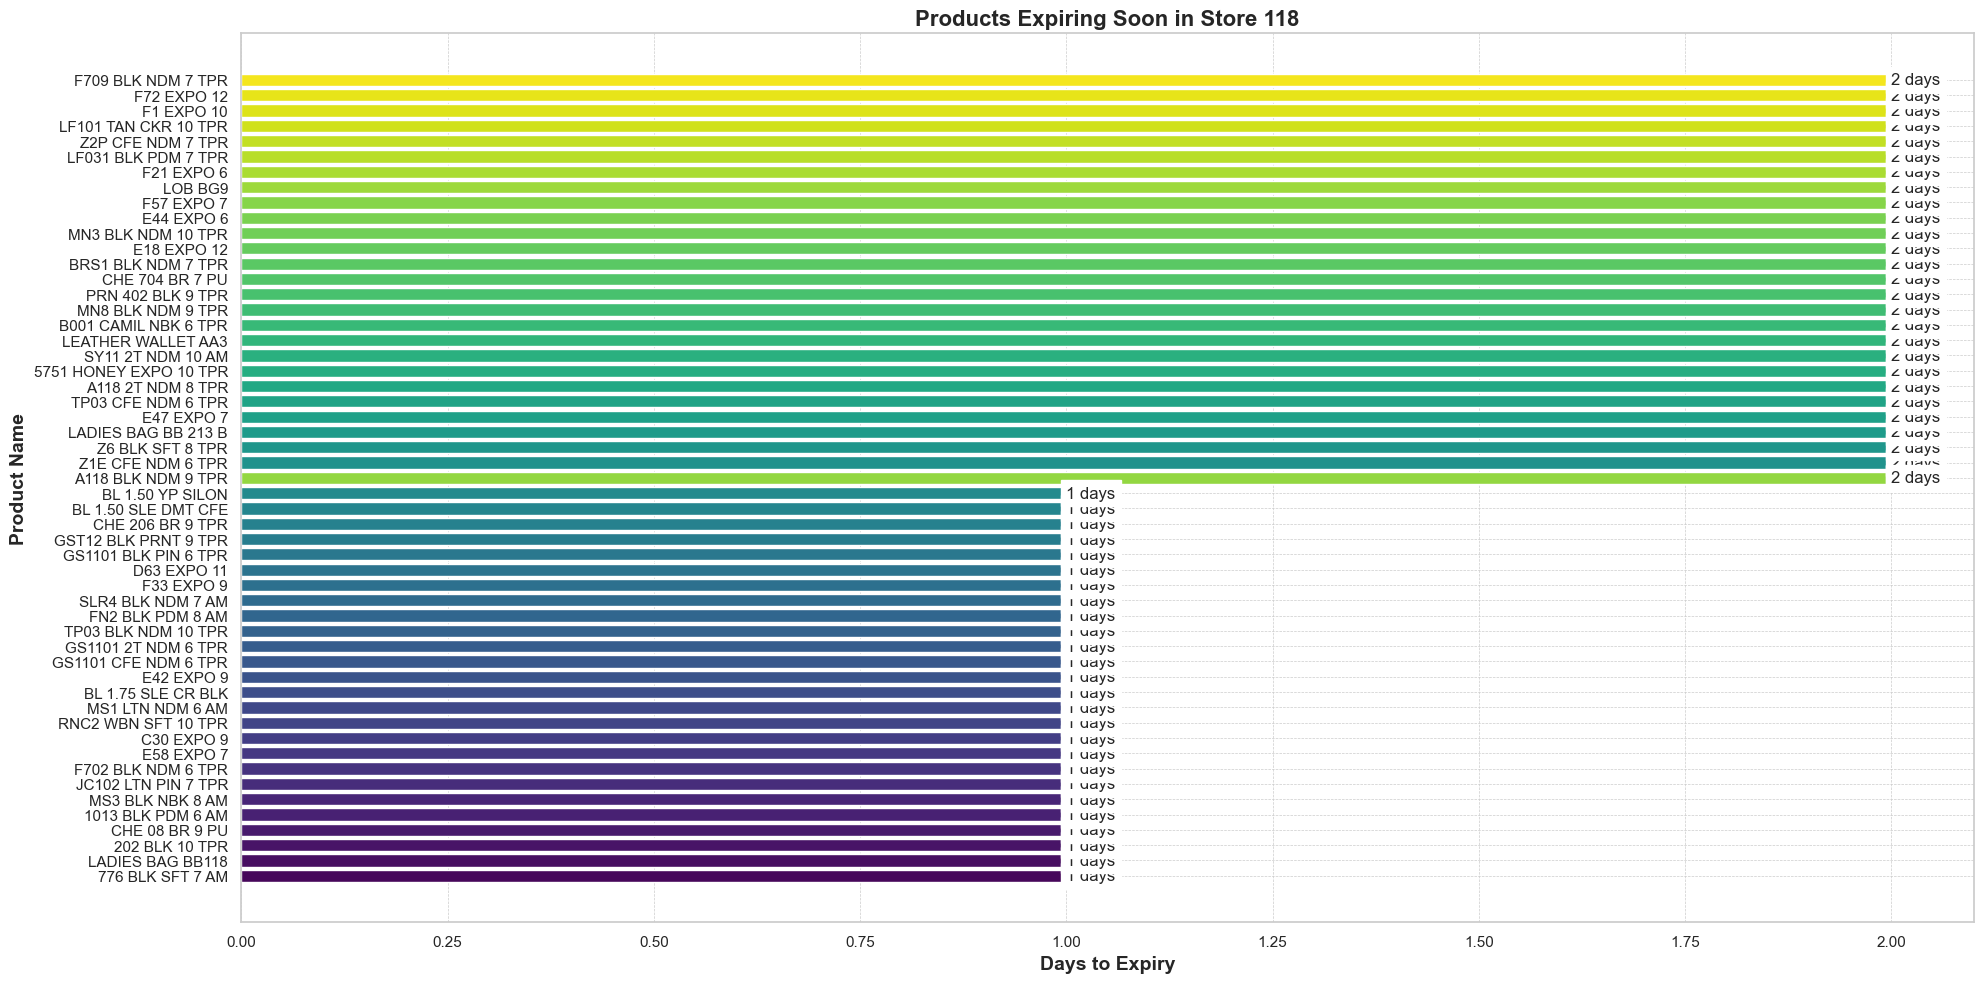

In [19]:
product_in_verge_of_expiry(product_batch_data,118,product_data)

In [47]:
# **14. Products which are bought together

def product_bought_together(transaction_data, transaction_product_data_1a, product_data):
    # Create a dictionary to store product pairs and their co-occurrence counts
    product_pairs = {}

    # Loop through each transaction
    for transaction in transaction_data['id']:
        # Get the products in the transaction
        products = transaction_product_data_1a[transaction_product_data_1a['transaction_id'] == transaction]['product_id'].tolist()

        # Iterate through each pair of products
        for i in range(len(products)):
            for j in range(i + 1, len(products)):
                if products[i] != products[j]:
                    # Create a tuple of the two products
                    product_pair = tuple(sorted([products[i], products[j]]))
    
                    # Check if the product pair is already in the dictionary
                    if product_pair in product_pairs:
                        # Increase the co-occurrence count
                        product_pairs[product_pair] += 1
                    else:
                        # Add the product pair to the dictionary with a count of 1
                        product_pairs[product_pair] = 1

    # Sort the product pairs by their co-occurrence counts
    sorted_product_pairs = sorted(product_pairs.items(), key=lambda x: x[1], reverse=True)
    print(sorted_product_pairs[:10])
    # Prepare data for DataFrame
    pairs_data = []
    for product_pair, count in sorted_product_pairs:
        product_1_name = product_data[product_data['id'] == product_pair[0]]['name'].values
        product_2_name = product_data[product_data['id'] == product_pair[1]]['name'].values
        pairs_data.append({
            'Product 1': product_1_name,
            'Product 2': product_2_name,
            'Co-occurrence Count': count
        })

    # # Create a DataFrame
    pairs_df = pd.DataFrame(pairs_data)

    pairs_df.to_csv('pairs_df.csv', index=False)
    
    # Extract the product pairs and their co-occurrence counts
    product_pairs, counts = zip(*sorted_product_pairs[:10])

    # Prepare data for the bar chart
    product_names = []
    for product_pair in product_pairs:
        product_1_name = product_data[product_data['id'] == product_pair[0]]['name'].values[0]
        product_2_name = product_data[product_data['id'] == product_pair[1]]['name'].values[0]
        product_names.append(f"{product_1_name} & {product_2_name}")

    # Set the style and color palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("viridis", len(product_names))

    # Create the bar chart
    plt.figure(figsize=(20, 8))
    bars = plt.bar(product_names, counts, color=palette)

    # Add labels and title with improved font size and weight
    plt.xlabel("Product Pairs", fontsize=14, weight='bold')
    plt.ylabel("Co-occurrence Count", fontsize=14, weight='bold')
    plt.title("Top 10 Most Frequently Bought Together Products", fontsize=16, weight='bold')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add data labels with background color for better readability
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, count, f"{count}", ha='center', va='bottom', fontsize=12, backgroundcolor='white')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
# product_bought_together(transaction_data, transaction_product_data_1a, product_data)


[((33117, 33650), 222), ((36347, 36349), 184), ((8513, 8597), 147), ((8522, 8597), 133), ((8597, 8612), 130), ((24867, 24907), 130), ((8513, 8522), 129), ((8513, 8612), 127), ((81066, 82631), 124), ((24944, 24953), 124)]


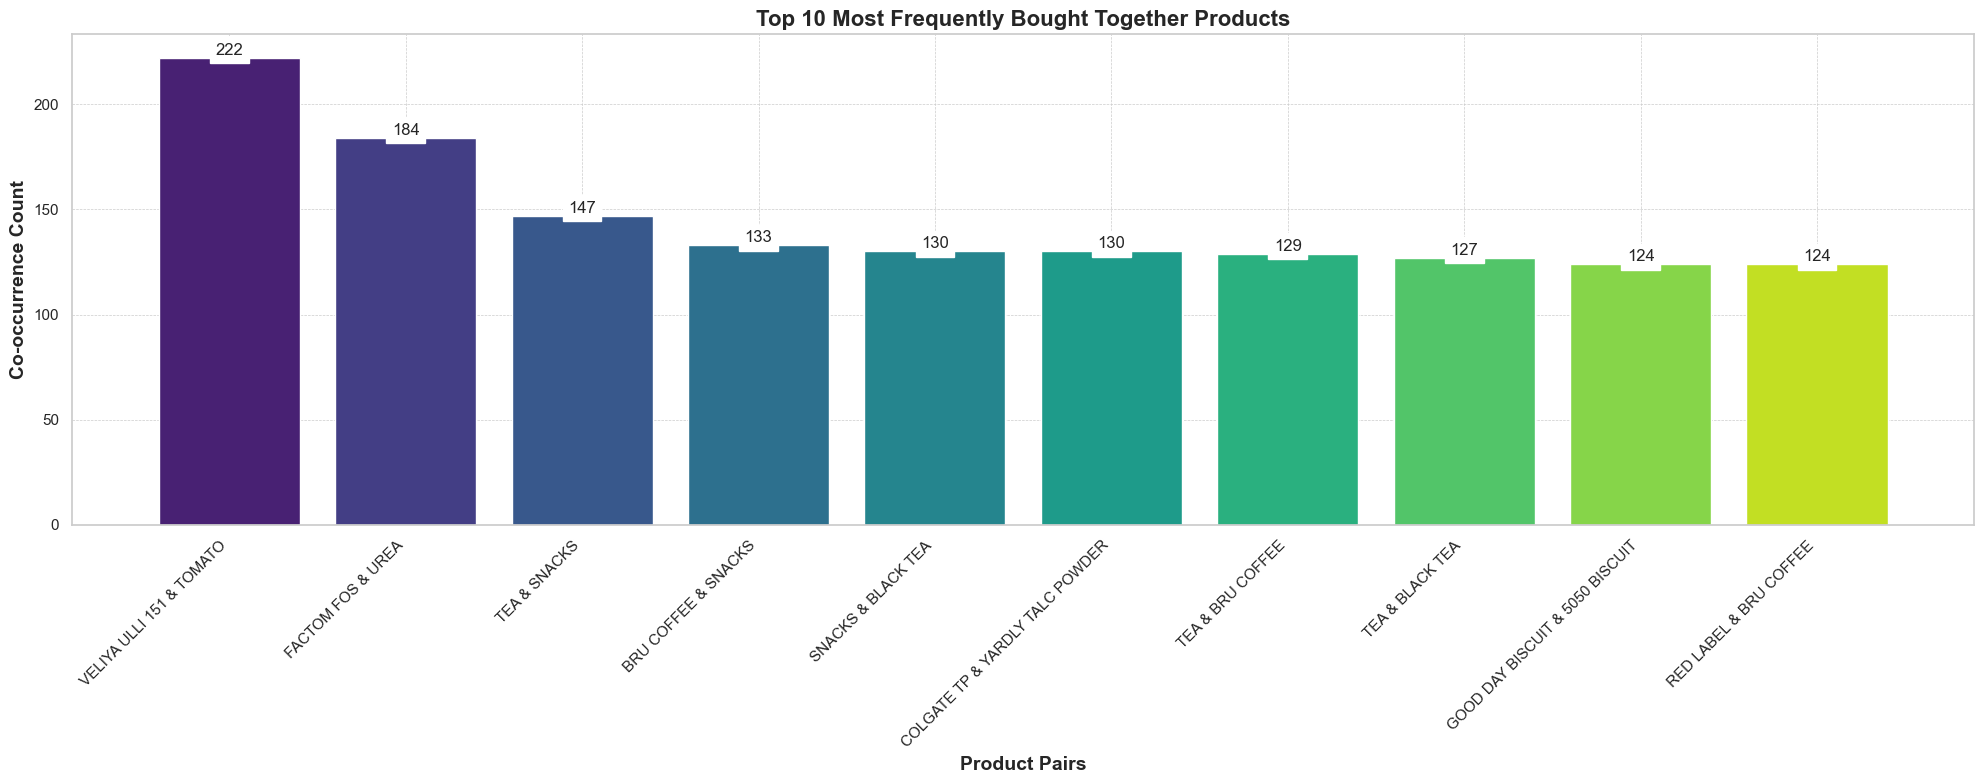

In [49]:
product_bought_together(transaction_data,transaction_product_data_1a,product_data)

In [49]:
# **15. Top 5 customers based on the amount of purchase in each store

def top5_customers_based_on_amount_by_store(store_id):
    # Merge transaction and customer data
    merged_data = pd.merge(transaction_data, transaction_product_data_1a, on='transaction_id', how='left')
    merged_data=merged_data[merged_data['Store_outlet_id']==store_id]
    # Calculate the total amount purchased by each customer for each store
    customer_purchases = merged_data.groupby(['customer_id_y', 'Store_outlet_id'])['net_amount'].sum()

    # Get the top 5 customers for each store based on total amount purchased
    top_5_customers_by_store = customer_purchases.groupby('Store_outlet_id').nlargest(5)

    # Print the top 5 customers for each store
    print("Top 5 Customers by Store (Based on Amount Purchased):")
    for store_id, customer_purchases in top_5_customers_by_store.groupby('Store_outlet_id'): # group the series by store id
        print(f"\nStore ID: {store_id}")
        for customer_id, amount in customer_purchases.items(): # iterate over the multi-index series
            #customer_name = customer_data[customer_data['customer_id'] == customer_id]['customer_name'].values[0]
            print(f"- Customer Id: {customer_id[1]}, Total Amount Purchased: {amount:.2f}")

    top_5_customers_by_store = customer_purchases.groupby('Store_outlet_id').nlargest(5)
    store_130_customers = top_5_customers_by_store.loc[store_id]

    customer_names = []
    purchase_amounts = []

    for customer_id, amount in store_130_customers.items():
        #customer_name = customer_data[customer_data['customer_id'] == customer_id]['customer_name'].values[0]
        customer_names.append(str(customer_id[1]))
        purchase_amounts.append(amount)

    plt.figure(figsize=(12, 6))
    plt.bar(customer_names, purchase_amounts)

    # Add labels and title
    plt.xlabel("Customers")
    plt.ylabel("Total Amount Purchased")
    plt.title("Top 5 Customers by Amount Purchased in Store ID 130")

    # Add data labels
    for i, amount in enumerate(purchase_amounts):
        plt.text(i, amount, str(amount), ha="center", va="bottom")

    # Show the plot
    plt.show()

Top 5 Customers by Store (Based on Amount Purchased):

Store ID: 79.0
- Customer Id: 761.0, Total Amount Purchased: 12000.00
- Customer Id: 1496.0, Total Amount Purchased: 8538.00
- Customer Id: 1811.0, Total Amount Purchased: 5796.00
- Customer Id: 1449.0, Total Amount Purchased: 5600.00
- Customer Id: 1766.0, Total Amount Purchased: 5433.00


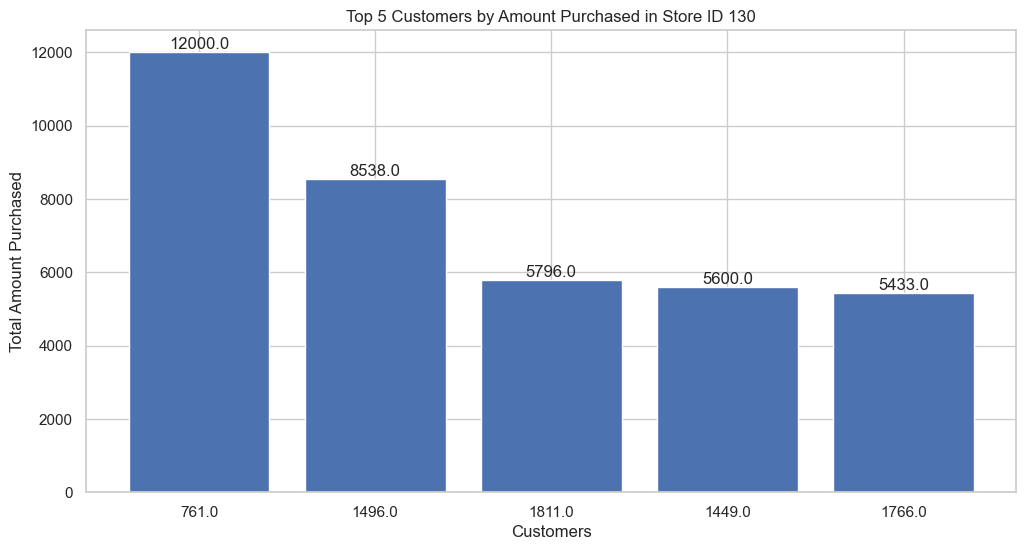

In [51]:
top5_customers_based_on_amount_by_store(79)

In [57]:
transaction_product_data_1a['profit'] = (transaction_product_data_1a['sales_price'] - transaction_product_data_1a['rate']) * transaction_product_data_1a['qty']

In [61]:
# **16. Top 5 most profitable products by store

merged_data = pd.merge(transaction_product_data_1a, product_batch_data, on='product_id')

# Calculate the profit for each product in each store
product_profit = merged_data.groupby(['Store_outlet_id', 'product_id'])['profit'].sum()

# Get the top 5 most profitable products for each store
top_5_products_by_store = product_profit.groupby('Store_outlet_id').nlargest(5)

# Print the top 5 most profitable products for each store
print("Top 5 Most Profitable Products by Store:")
for store_id, products in top_5_products_by_store.groupby('Store_outlet_id'):
    print(f"\nStore ID: {store_id}")
    for product_id, profit in products.items():
        # product_name = product_data[product_data['id'] == product_id]['name'].values[0]
        print(f"- Product Id: {product_id[2]}, Profit: {profit:.2f}")

Top 5 Most Profitable Products by Store:

Store ID: 2
- Product Id: 269, Profit: 25929164.01
- Product Id: 6418, Profit: 4267201.12
- Product Id: 137, Profit: 4132658.40
- Product Id: 6888, Profit: 1646932.68
- Product Id: 6914, Profit: 1626795.04

Store ID: 4
- Product Id: 497, Profit: 444840.00
- Product Id: 1216, Profit: 163317.00
- Product Id: 665, Profit: 159264.00
- Product Id: 1215, Profit: 155641.20
- Product Id: 1058, Profit: 139380.00

Store ID: 6
- Product Id: 6693, Profit: 1184079.10
- Product Id: 7314, Profit: 30.00
- Product Id: 56008, Profit: 0.00

Store ID: 9
- Product Id: 8513, Profit: 0.00

Store ID: 11
- Product Id: 2726, Profit: 37800.00
- Product Id: 23928, Profit: 26924.40
- Product Id: 23929, Profit: 24238.68
- Product Id: 6251, Profit: 24000.00
- Product Id: 155374, Profit: 21588.80

Store ID: 13
- Product Id: 3797, Profit: 9742746.87
- Product Id: 4113, Profit: 8387764.88
- Product Id: 3843, Profit: 4980597.92
- Product Id: 3763, Profit: 2214765.00
- Product Id

# Growth

In [70]:
# **1. Sales growth by store in a time period
def sales_growth_in_specific_time_period(transaction_data):
    # Filter data by the desired time period
    start_date = '2023-01-01'
    end_date = '2023-12-31'

    filtered_data = transaction_data[(transaction_data['transaction_date'] >= start_date) & (transaction_data['transaction_date'] <= end_date)]

    # Calculate the total sales for each store
    store_sales = filtered_data.groupby('store_outlet_id')['net_amount'].sum()

    # Calculate the total sales for each store in the previous time period
    previous_start_date = '2022-01-01'
    previous_end_date = '2022-12-31'

    previous_filtered_data = transaction_data[(transaction_data['transaction_date'] >= previous_start_date) & (transaction_data['transaction_date'] <= previous_end_date)]

    previous_store_sales = previous_filtered_data.groupby('store_outlet_id')['net_amount'].sum()

    # Calculate the sales growth for each store
    growth_by_store = (store_sales - previous_store_sales) / previous_store_sales * 100

    # # Print the sales growth for each store
    # print("Sales Growth by Store:")
    # for store_id, growth in growth_by_store.items():
    #     print(f"Store ID: {store_id}, Growth: {growth:.2f}%")

    # Convert index to string for bar labels
    string_list = [str(element) for element in growth_by_store.index]

    # Set the style and color palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("husl", len(growth_by_store))

    # Create the bar chart
    plt.figure(figsize=(18, 10))
    bars = plt.bar(string_list, growth_by_store.values, color=palette)

    # Add labels and title with improved font size and weight
    plt.xlabel("Store ID", fontsize=14, weight='bold')
    plt.ylabel("Sales Growth (%)", fontsize=14, weight='bold')
    plt.title("Sales Growth by Store (2023 vs. 2022)", fontsize=16, weight='bold')

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Rotate x-axis labels if necessary
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Add data labels with background color for better readability
    for bar, growth in zip(bars, growth_by_store.values):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{growth:.2f}%", ha='center', va='bottom', fontsize=12, backgroundcolor='white')

    # Display the plot
    plt.tight_layout()
    plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

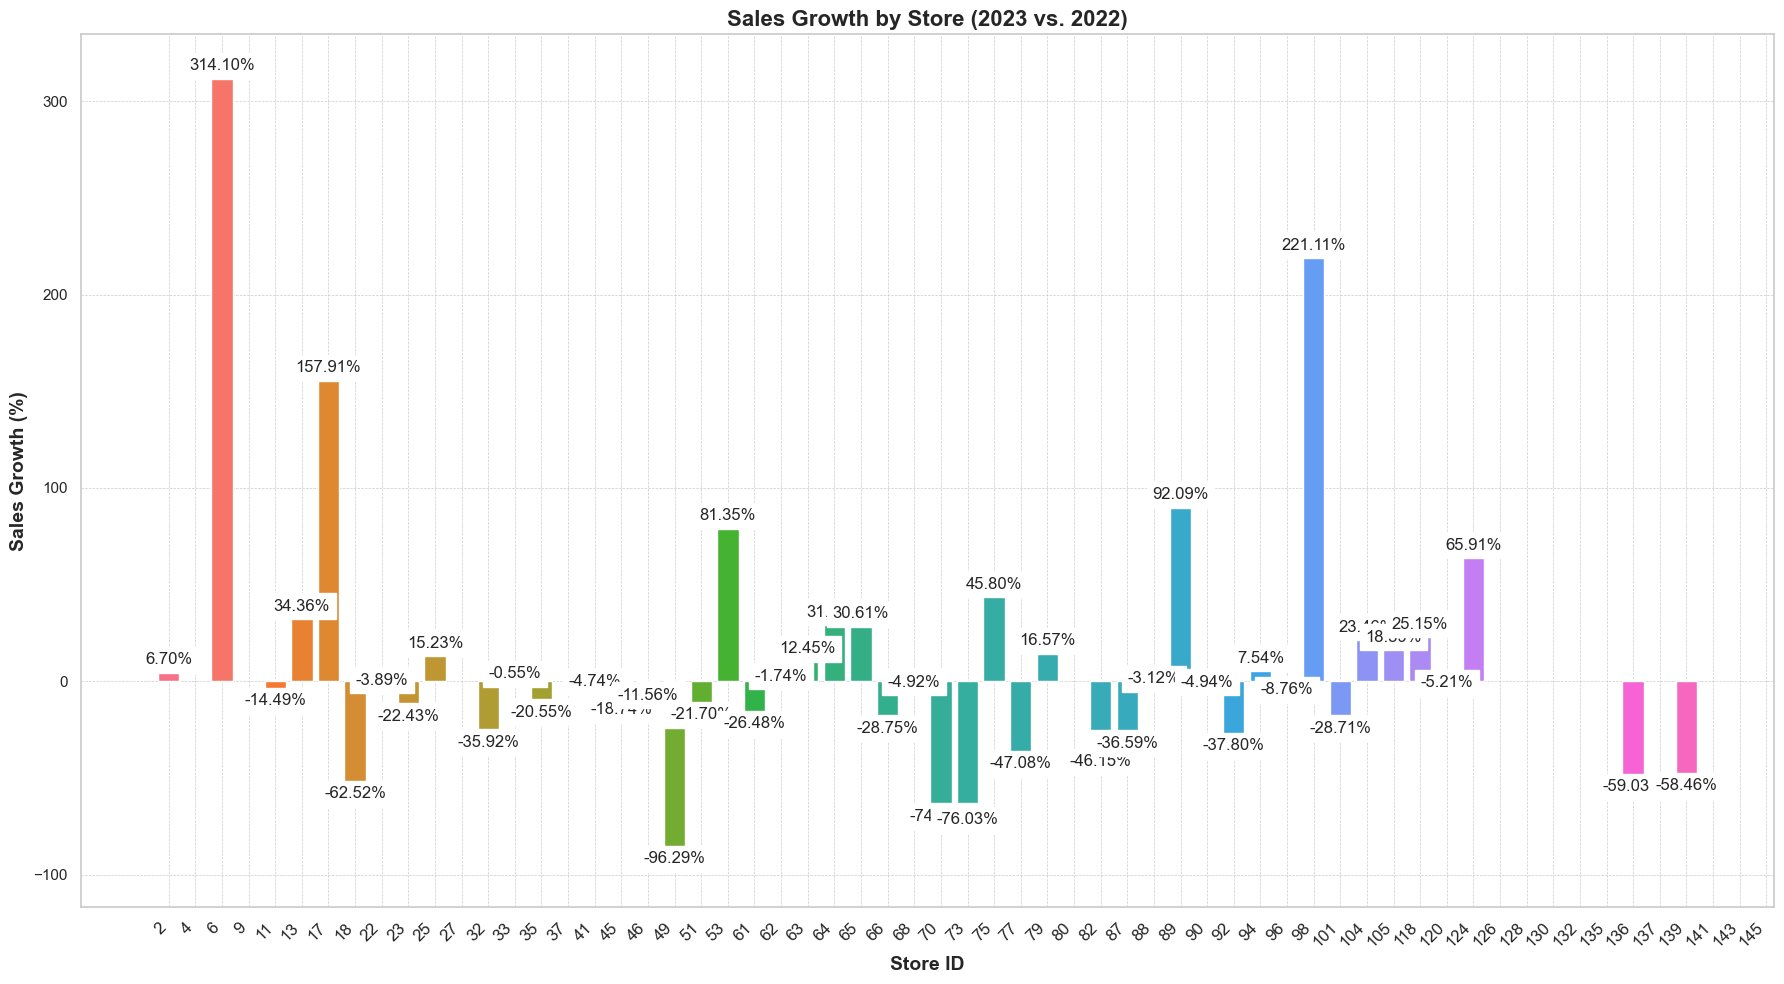

In [71]:
sales_growth_in_specific_time_period(transaction_data)

In [82]:
# **2. Average customer traffic in year
def average_customer_traffic_in_a_year(transaction_data,year):
    # Convert 'transaction_date' to datetime
    transaction_data['transaction_date'] = pd.to_datetime(transaction_data['transaction_date']) # Convert the 'transaction_date' column to datetime

    # Filter data for 2023
    transaction_data_2023 = transaction_data[transaction_data['transaction_date'].dt.year == year]

    # Group data by store ID and month
    grouped_data = transaction_data_2023.groupby(['store_outlet_id', pd.Grouper(key='transaction_date', freq='M')]).size()

    # Calculate average customer traffic per month
    average_traffic_by_store = grouped_data.groupby(level=0).mean()

    # # Print the average customer traffic for each store
    # print("Average Customer Traffic in 2023 by Store:")
    # for store_id, average_traffic in average_traffic_by_store.items():
    #     print(f"Store ID: {store_id}, Average Traffic: {average_traffic:.2f}")

    # Convert index to string for bar labels
    string_list = [str(element) for element in average_traffic_by_store.index]

    # Set the style and color palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("husl", len(average_traffic_by_store))

    # Create the horizontal bar chart
    plt.figure(figsize=(18, 10))
    bars = plt.barh(string_list, average_traffic_by_store.values, color=palette)

    # Add labels and title with improved font size and weight
    plt.ylabel("Store ID", fontsize=14, weight='bold')
    plt.xlabel("Average Customer Traffic", fontsize=14, weight='bold')
    plt.title("Average Customer Traffic by Store in 2023", fontsize=16, weight='bold')

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add data labels with background color for better readability
    for bar, average_traffic in zip(bars, average_traffic_by_store.values):
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{average_traffic:.2f}", ha='left', va='center', fontsize=12, backgroundcolor='white')

    # Display the plot
    plt.tight_layout()
    plt.show()


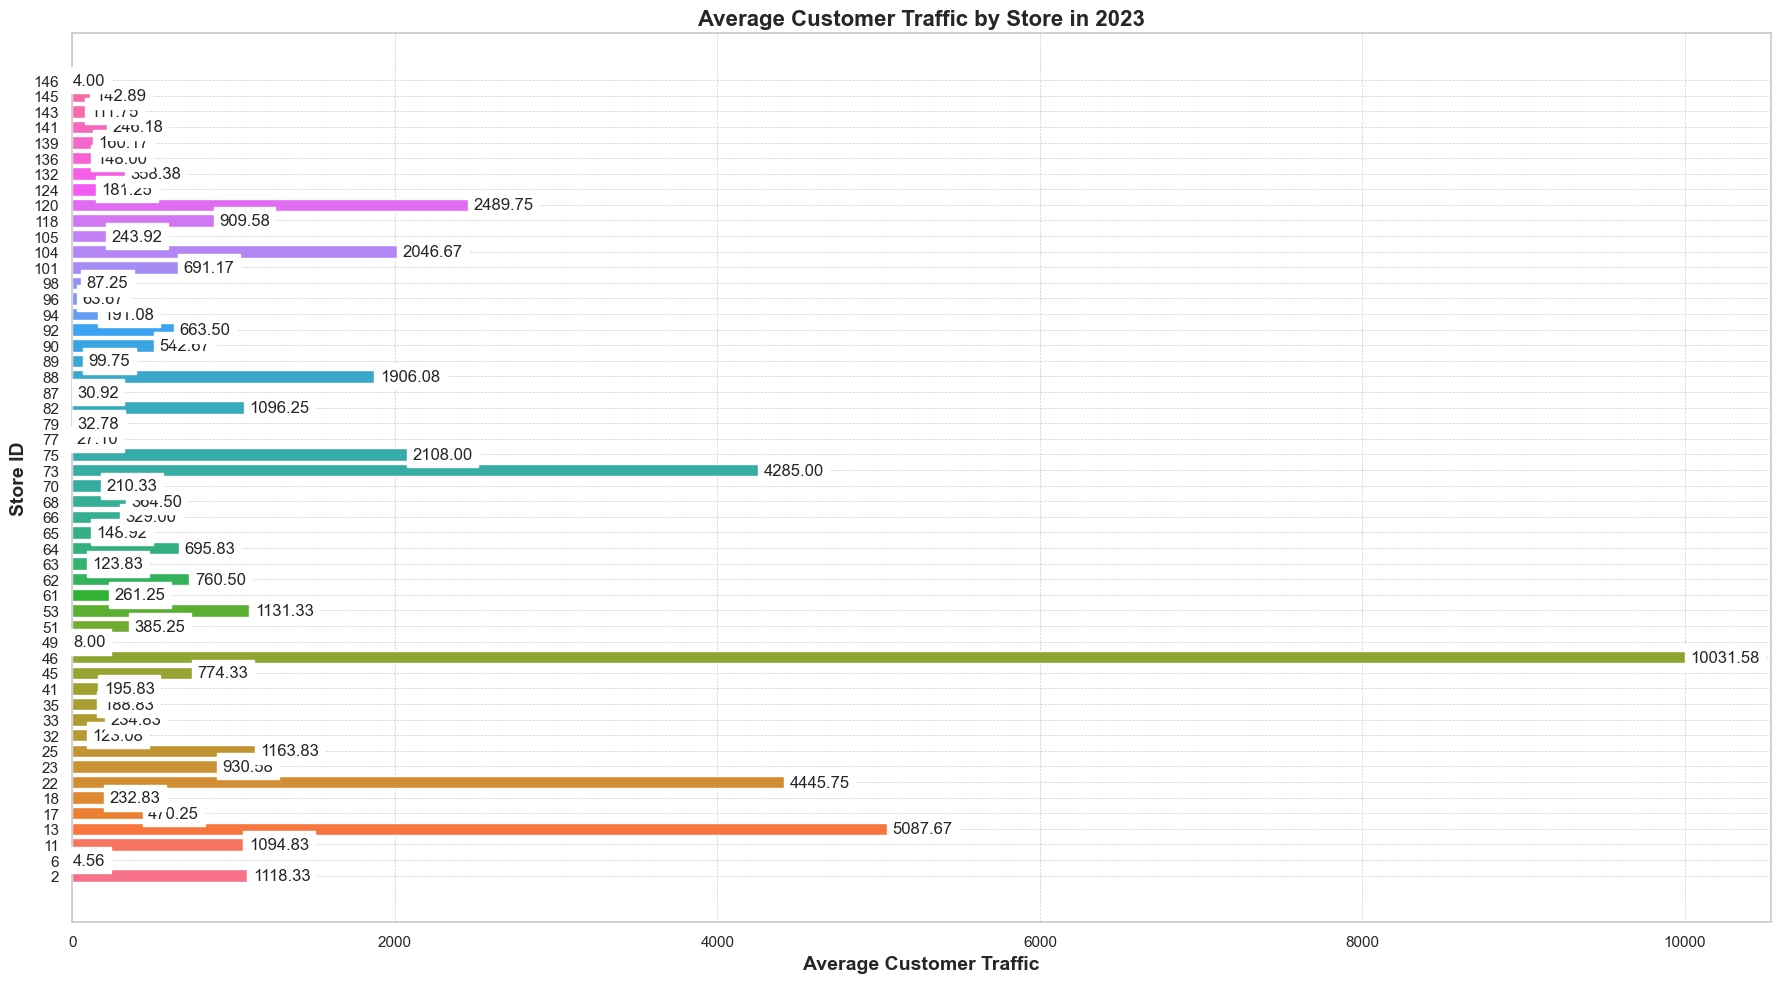

In [83]:
average_customer_traffic_in_a_year(transaction_data,2023)

In [86]:
# **3. Average customer traffic in store 2 monthly in the year 2022
def average_customer_traffic_in_specific_store_per_month(transaction_data,year,store_id):
    # Convert 'transaction_date' to datetime
    transaction_data['transaction_date'] = pd.to_datetime(transaction_data['transaction_date'])

    # Filter data for 2022 and store 2
    transaction_data_2022_store2 = transaction_data[(transaction_data['transaction_date'].dt.year == year) & (transaction_data['store_outlet_id'] == store_id)]

    # Group data by month and count transactions
    monthly_traffic = transaction_data_2022_store2.groupby(pd.Grouper(key='transaction_date', freq='M')).size()

    # Calculate average customer traffic per month
    average_traffic_by_month = monthly_traffic  # No need to calculate the mean again

    # Print the average customer traffic for each month
    print("Average Customer Traffic in Store 2 by Month (2022):")
    for month, average_traffic in average_traffic_by_month.items():
        print(f"{month.strftime('%Y-%m')}: {average_traffic:.2f}")


    # Convert 'transaction_date' to datetime
    transaction_data['transaction_date'] = pd.to_datetime(transaction_data['transaction_date'])

    # Filter data for 2022 and store 2
    transaction_data_2022_store2 = transaction_data[(transaction_data['transaction_date'].dt.year == year) & (transaction_data['store_outlet_id'] == store_id)]

    # Group data by month and count transactions
    monthly_traffic = transaction_data_2022_store2.groupby(pd.Grouper(key='transaction_date', freq='M')).size()

    # Set the style
    sns.set(style="whitegrid")

    # Create the line chart
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=monthly_traffic.index.strftime('%Y-%m'), y=monthly_traffic.values, marker='o', color='b')

    # Add labels and title with improved font size and weight
    plt.xlabel("Month", fontsize=14, weight='bold')
    plt.ylabel("Average Customer Traffic", fontsize=14, weight='bold')
    plt.title("Average Customer Traffic in Store 2 by Month (2022)", fontsize=16, weight='bold')

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Rotate x-axis labels if necessary
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Add data labels for each point
    for i, value in enumerate(monthly_traffic.values):
        plt.text(i, value, f"{value:.0f}", ha='center', va='bottom', fontsize=12, backgroundcolor='white')

    # Display the plot
    plt.tight_layout()
    plt.show()


Average Customer Traffic in Store 2 by Month (2022):
2022-04: 2187.00
2022-05: 2287.00
2022-06: 2302.00
2022-07: 2313.00
2022-08: 2222.00
2022-09: 1732.00
2022-10: 1980.00
2022-11: 2065.00
2022-12: 2310.00


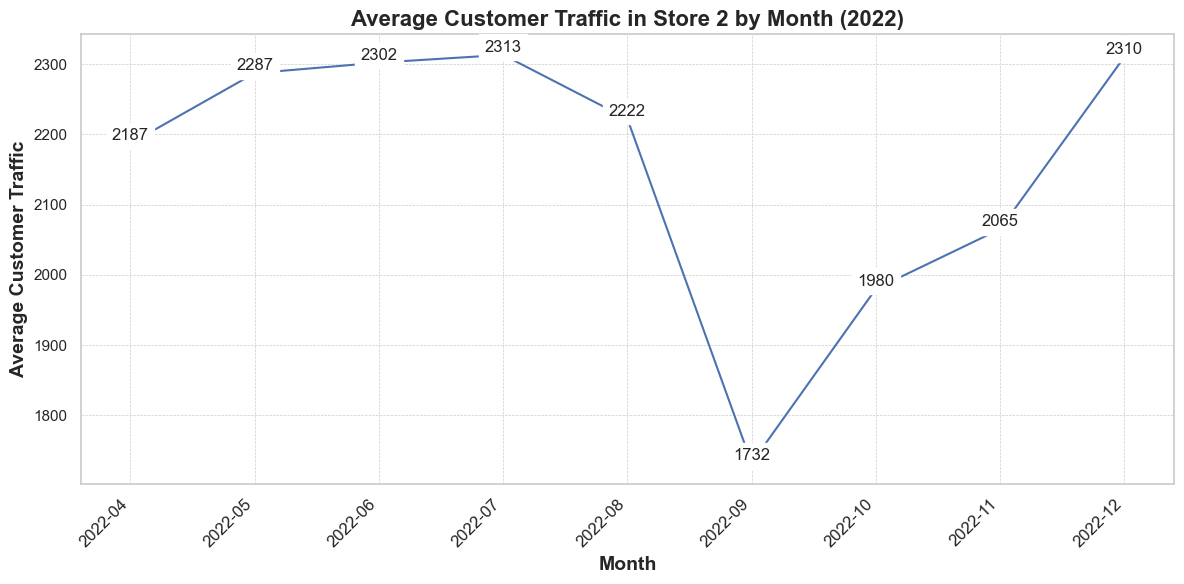

In [87]:
average_customer_traffic_in_specific_store_per_month(transaction_data,2022,75)

In [99]:
# **4. Average transaction value by store in the month
def average_transaction_value_by_store_in_specific_month(transaction_data,year,month):
    # Convert 'transaction_date' to datetime
    transaction_data['transaction_date'] = pd.to_datetime(transaction_data['transaction_date'])

    # Filter data for 2022 and February
    year = 2022
    month = 2
    transaction_data_filtered = transaction_data[(transaction_data['transaction_date'].dt.year == year) & (transaction_data['transaction_date'].dt.month == month)]

    # Check if the filtered DataFrame is empty
    if transaction_data_filtered.empty:
        print("No transactions found for the specified year and month.")
    else:
        # Calculate average transaction value by store
        average_transaction_value_by_store = transaction_data_filtered.groupby('store_outlet_id')['net_amount'].mean()

        # # Print the average transaction value for each store
        # month_name = transaction_data_filtered['transaction_date'].dt.month_name().iloc[0] if not transaction_data_filtered['transaction_date'].empty else "Unknown" # Handle the case of empty DataFrame
        # print("Average Transaction Value by Store in {}:".format(month_name))
        # for store_id, average_value in average_transaction_value_by_store.items():
        #     print(f"Store ID: {store_id}, Average Transaction Value: {average_value:.2f}")


    # Set the style and color palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("viridis", len(average_transaction_value_by_store))

    # Create the bar chart
    plt.figure(figsize=(25, 10))
    bars = plt.bar(average_transaction_value_by_store.index, average_transaction_value_by_store.values, color=palette)

    # Add labels and title with improved font size and weight
    plt.xlabel("Store ID", fontsize=14, weight='bold')
    plt.ylabel("Average Transaction Value", fontsize=14, weight='bold')
    plt.title(f"Average Transaction Value by Store in {month_name}", fontsize=16, weight='bold')

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add data labels with background color for better readability
    for bar, value in zip(bars, average_transaction_value_by_store.values):
        plt.text(bar.get_x() + bar.get_width() / 2, value, f"{value:.2f}", ha='center', va='bottom', fontsize=12, backgroundcolor='white')

    # Display the plot
    plt.tight_layout()
    plt.show()


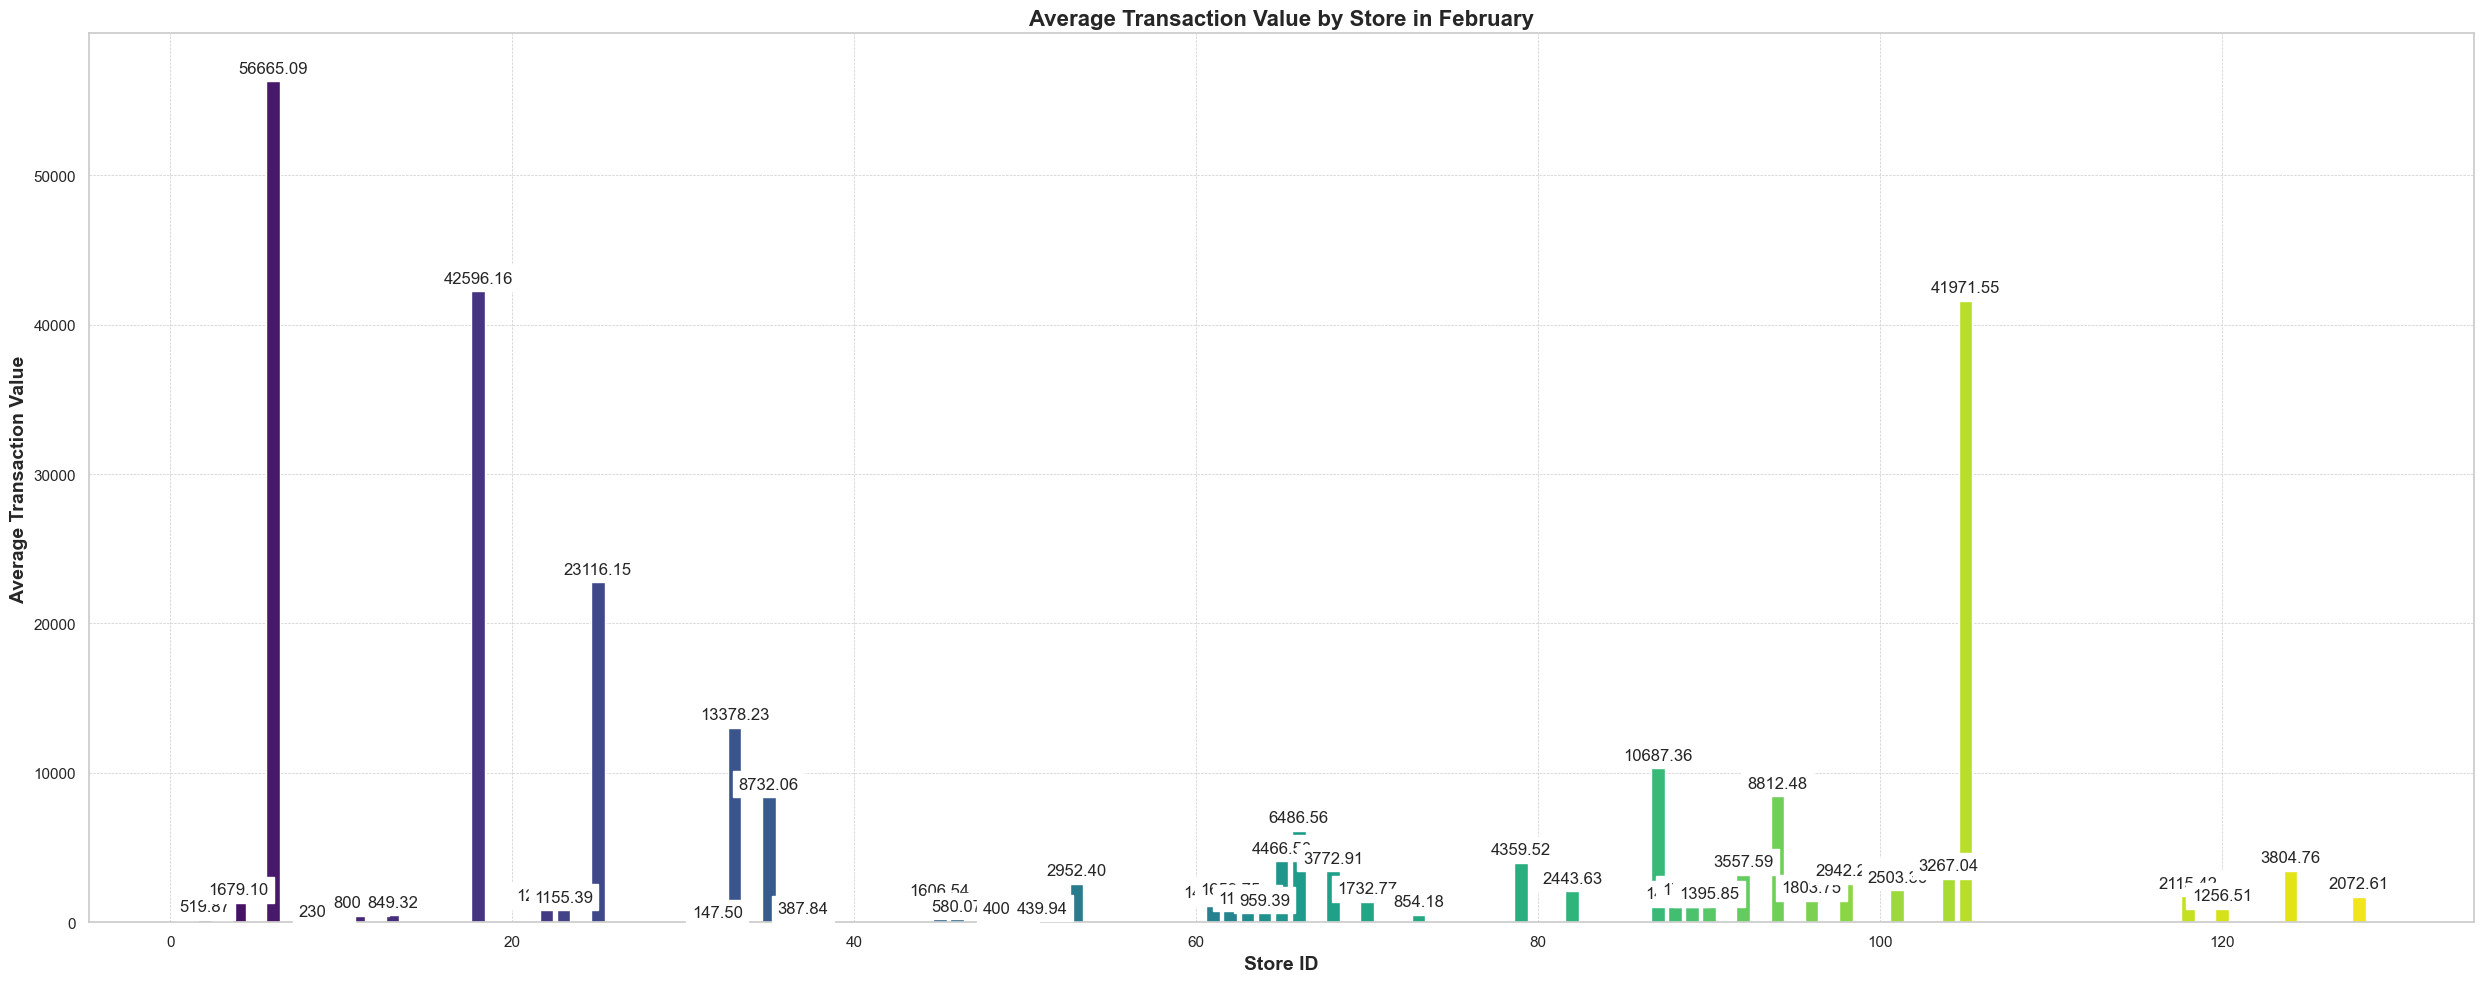

In [100]:
average_transaction_value_by_store_in_specific_month(transaction_data,2023,3)

In [101]:
# **5. Average transaction value in specific store
def average_transaction_value_in_specific_store_in_year(transaction_data,year,store_id):
    # Convert 'transaction_date' to datetime
    transaction_data['transaction_date'] = pd.to_datetime(transaction_data['transaction_date'])

    # Filter data for 2022 and store 2
    transaction_data_2022_store2 = transaction_data[(transaction_data['transaction_date'].dt.year == year) & (transaction_data['store_outlet_id'] == store_id)]

    # Group data by month and calculate average transaction value
    average_transaction_value_by_month = transaction_data_2022_store2.groupby(pd.Grouper(key='transaction_date', freq='M'))['net_amount'].mean()

    # Set the style
    sns.set(style="whitegrid")

    # Create a color palette
    colors = sns.color_palette("viridis", len(average_transaction_value_by_month))

    # Create the bar chart with color gradient
    plt.figure(figsize=(12, 6))
    bars = plt.bar(average_transaction_value_by_month.index.strftime('%Y-%m'), average_transaction_value_by_month.values, color=colors)

    # Add labels and title with improved font size and weight
    plt.xlabel("Month", fontsize=14, weight='bold')
    plt.ylabel("Average Transaction Value", fontsize=14, weight='bold')
    plt.title("Average Transaction Value in Store 2 per Month in 2022", fontsize=16, weight='bold')

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add data labels with background color for better readability
    for bar, value in zip(bars, average_transaction_value_by_month.values):
        plt.text(bar.get_x() + bar.get_width() / 2, value, f"{value:.2f}", ha='center', va='bottom', fontsize=12, backgroundcolor='white')

    # Display the plot
    plt.tight_layout()
    plt.show()


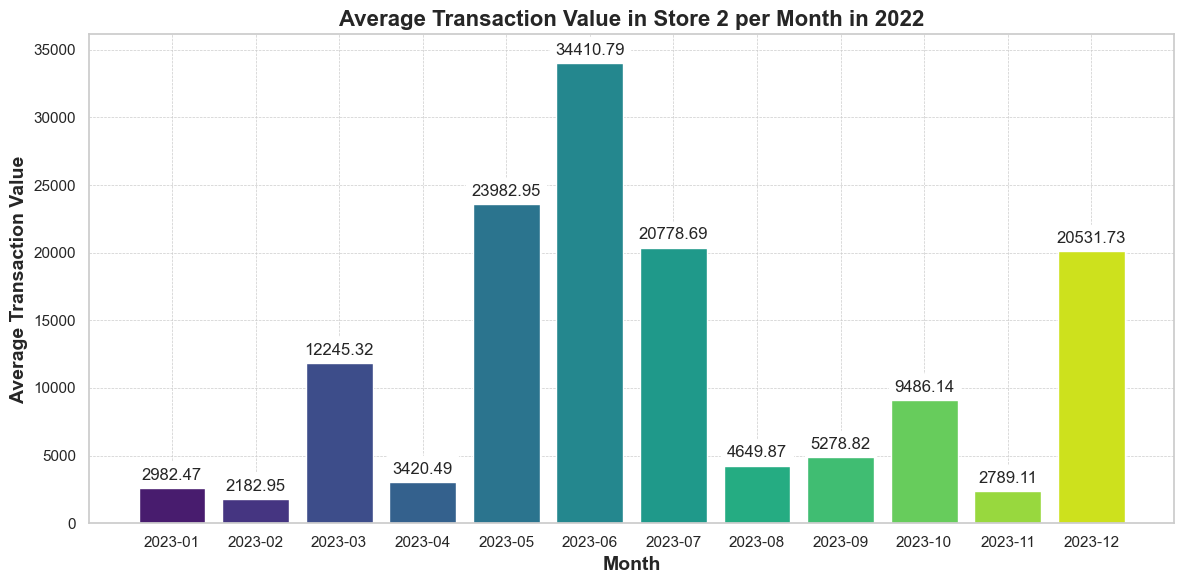

In [102]:
average_transaction_value_in_specific_store_in_year(transaction_data,2023,96)

In [131]:
# **7. Average basket size in each store in specific month
def average_basket_size_specific_month(transaction_data,year,month):
    # Convert 'transaction_date' to datetime
    transaction_data['transaction_date'] = pd.to_datetime(transaction_data['transaction_date'])

    transaction_data_filtered = transaction_data[(transaction_data['transaction_date'].dt.year == year) & (transaction_data['transaction_date'].dt.month == month)]

    # Check if the filtered DataFrame is empty
    if transaction_data_filtered.empty:
        print("No transactions found for the specified year and month.")
    else:
        # Merge transaction and product data
        transaction_product_data = pd.merge(transaction_data_filtered, transaction_product_data_1a, on='transaction_id', how='left')

        # Calculate the average number of items purchased per transaction for each store
        average_items_per_transaction = transaction_product_data.groupby('store_outlet_id')['qty'].mean()

        # Print the average number of items purchased per transaction for each store
        month_name = transaction_data_filtered['transaction_date'].dt.month_name().iloc[0] if not transaction_data_filtered['transaction_date'].empty else "Unknown" # Handle the case of empty DataFrame
        print("Average Number of Items Purchased per Transaction in {} by Store:".format(month_name))
        for store_id, average_items in average_items_per_transaction.items():
            print(f"Store ID: {store_id}, Average Items: {average_items:.2f}")

    # Set the style and color palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("viridis", len(average_items_per_transaction))

    # Create the bar chart
    plt.figure(figsize=(25, 10))
    bars = plt.bar(average_items_per_transaction.index, average_items_per_transaction.values, color=palette)

    # Add labels and title with improved font size and weight
    plt.xlabel("Store ID", fontsize=14, weight='bold')
    plt.ylabel("Average Items per Transaction", fontsize=14, weight='bold')
    plt.title(f"Average Number of Items Purchased per Transaction by Store in {month_name}", fontsize=16, weight='bold')

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add data labels with background color for better readability
    for bar, value in zip(bars, average_items_per_transaction.values):
        plt.text(bar.get_x() + bar.get_width() / 2, value, f"{value:.2f}", ha='center', va='bottom', fontsize=12, backgroundcolor='white')

    # Display the plot
    plt.tight_layout()
    plt.show()

posx and posy should be finite values
posx and posy should be finite values


Average Number of Items Purchased per Transaction in January by Store:
Store ID: 2, Average Items: 6.01
Store ID: 4, Average Items: 16.97
Store ID: 6, Average Items: 7.50
Store ID: 9, Average Items: 4.45
Store ID: 11, Average Items: 3.79
Store ID: 13, Average Items: 12.79
Store ID: 18, Average Items: 7.30
Store ID: 22, Average Items: 14.46
Store ID: 23, Average Items: 6.92
Store ID: 25, Average Items: 163.85
Store ID: 32, Average Items: 2.50
Store ID: 33, Average Items: 1184.45
Store ID: 35, Average Items: 228.77
Store ID: 37, Average Items: 8.44
Store ID: 45, Average Items: 26.22
Store ID: 46, Average Items: 9.72
Store ID: 49, Average Items: 10.28
Store ID: 51, Average Items: 5.89
Store ID: 53, Average Items: 13.09
Store ID: 61, Average Items: 12.72
Store ID: 62, Average Items: 72.88
Store ID: 63, Average Items: 6.99
Store ID: 64, Average Items: 39.66
Store ID: 65, Average Items: 114.27
Store ID: 66, Average Items: 259.03
Store ID: 68, Average Items: 11.43
Store ID: 70, Average Items:

posx and posy should be finite values
posx and posy should be finite values


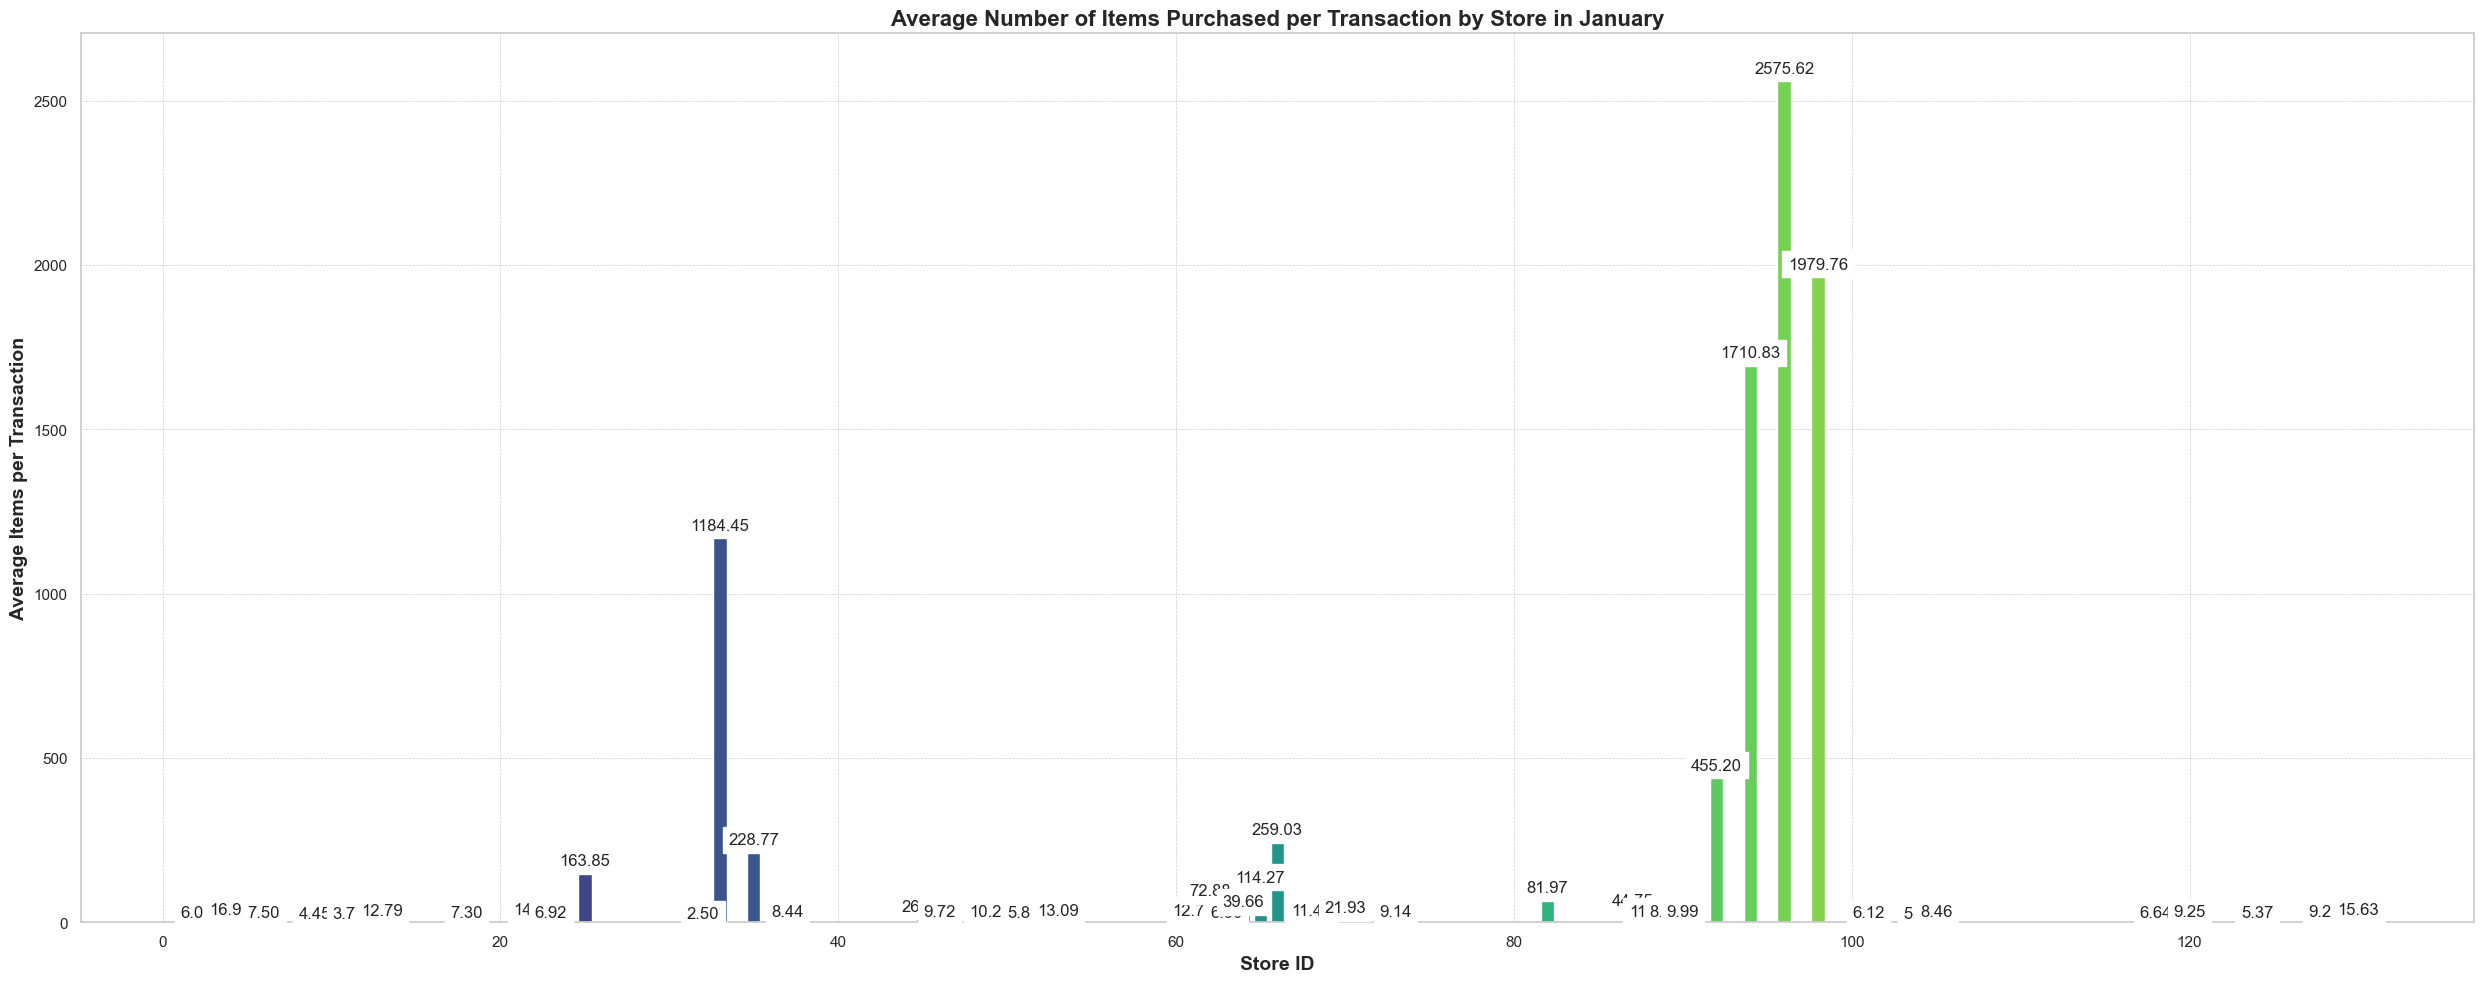

In [132]:
average_basket_size_specific_month(transaction_data,2022,1)

In [124]:
# **8. Profit generated by each store in the year 2022
def profit_in_each_store_by_year(transaction_product,year):
    # Filter data for 2022
    transaction_data_2022 = transaction_product[transaction_product['transaction_date'].dt.year == year]

    # Calculate profit for each transaction
    transaction_data_2022['profit'] = (transaction_data_2022['sales_price'] - transaction_data_2022['rate']) * transaction_data_2022['qty']

    # Group by store ID and sum the profits
    profit_by_store = transaction_data_2022.groupby('Store_outlet_id')['profit'].sum()

    # Print the profit for each store
    print("Profit Generated by Each Store in 2022:")
    for store_id, profit in profit_by_store.items():
        print(f"Store ID: {store_id}, Profit: {profit:.2f}")

    # Set the style and color palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("viridis", len(profit_by_store))

    # Create subplots with 2 rows and 1 column
    fig, axs = plt.subplots(2, 1, figsize=(25, 20))

    # Filter the data for store IDs greater than and less than 65
    top_stores = profit_by_store[profit_by_store.index > 65].sort_index()
    bottom_stores = profit_by_store[profit_by_store.index <= 65].sort_index()

    # First subplot: store IDs greater than 65
    bars1 = axs[0].bar(top_stores.index, top_stores.values, color=palette[:len(top_stores)])

    # Add labels and title for the first subplot
    axs[0].set_xlabel("Store ID", fontsize=14, weight='bold')
    axs[0].set_ylabel("Profit", fontsize=14, weight='bold')
    axs[0].set_title("Stores with ID > 65 by Profit in 2022", fontsize=16, weight='bold')
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
    for bar, profit in zip(bars1, top_stores.values):
        axs[0].text(bar.get_x() + bar.get_width() / 2, profit, f"{profit:.2f}", ha='center', va='bottom', fontsize=12, backgroundcolor='white')

    # Second subplot: store IDs less than or equal to 65
    bars2 = axs[1].bar(bottom_stores.index, bottom_stores.values, color=palette[:len(bottom_stores)])

    # Add labels and title for the second subplot
    axs[1].set_xlabel("Store ID", fontsize=14, weight='bold')
    axs[1].set_ylabel("Profit", fontsize=14, weight='bold')
    axs[1].set_title("Stores with ID <= 65 by Profit in 2022", fontsize=16, weight='bold')
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
    for bar, profit in zip(bars2, bottom_stores.values):
        axs[1].text(bar.get_x() + bar.get_width() / 2, profit, f"{profit:.2f}", ha='center', va='bottom', fontsize=12, backgroundcolor='white')

    # Adjust layout
    plt.tight_layout()

    # Display the plot
    plt.show()


C:\Users\bhara\AppData\Local\Temp\ipykernel_18508\56367367.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data_2022['profit'] = (transaction_data_2022['sales_price'] - transaction_data_2022['rate']) * transaction_data_2022['qty']


Profit Generated by Each Store in 2022:
Store ID: 2, Profit: 104158.26
Store ID: 4, Profit: 122542.75
Store ID: 6, Profit: 1112.42
Store ID: 9, Profit: 0.00
Store ID: 11, Profit: 51419.47
Store ID: 13, Profit: 338727.96
Store ID: 18, Profit: 630065.57
Store ID: 22, Profit: 506264.48
Store ID: 23, Profit: 284976.30
Store ID: 25, Profit: 210312.61
Store ID: 32, Profit: 1467.81
Store ID: 33, Profit: 27772.39
Store ID: 35, Profit: -1177855.35
Store ID: 37, Profit: 27710.02
Store ID: 45, Profit: 204025.59
Store ID: 46, Profit: 323403.70
Store ID: 49, Profit: 66736.30
Store ID: 51, Profit: 14089.47
Store ID: 53, Profit: 458205.55
Store ID: 61, Profit: 50571.72
Store ID: 62, Profit: 121480.43
Store ID: 63, Profit: 4789.17
Store ID: 64, Profit: 64880.16
Store ID: 65, Profit: 39031.34
Store ID: 66, Profit: 696503.41
Store ID: 68, Profit: 359587.91
Store ID: 70, Profit: 58319.57
Store ID: 73, Profit: 363652.98
Store ID: 77, Profit: 6969.97
Store ID: 79, Profit: 1300.03
Store ID: 82, Profit: 9267

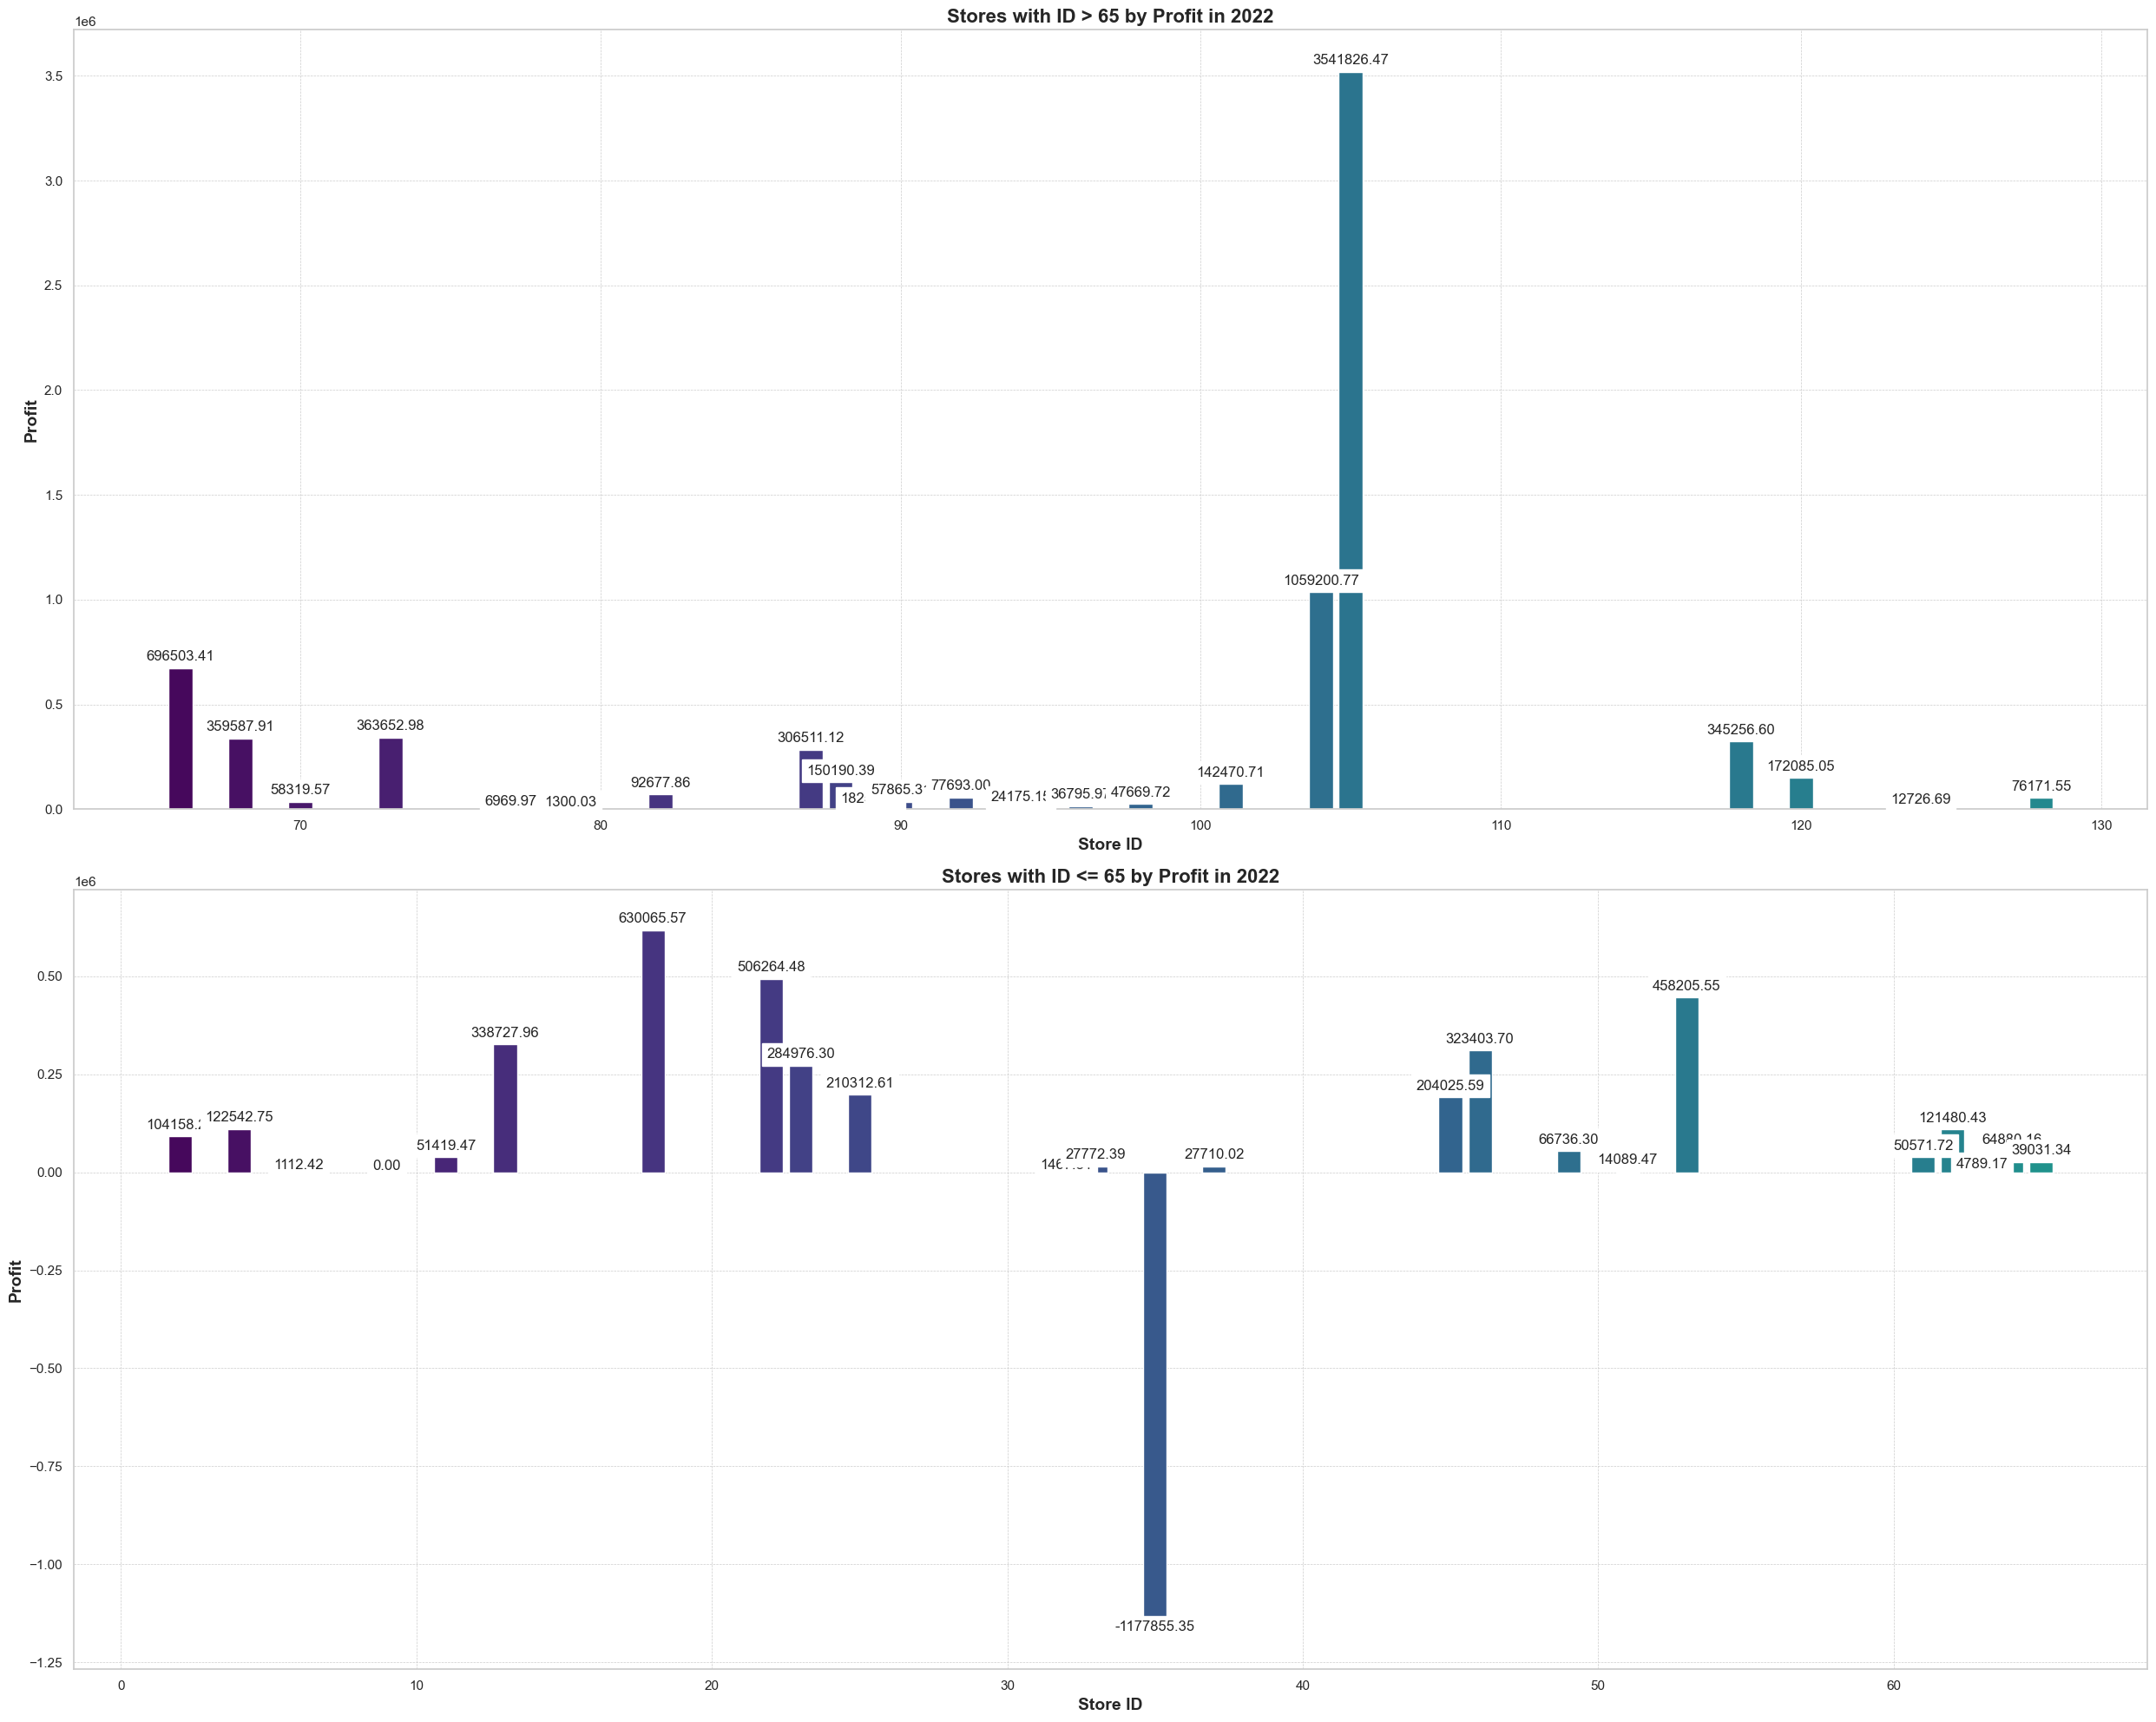

In [130]:
profit_in_each_store_by_year(transaction_product_data_1a,2021)

In [51]:
pair_df=pd.read_csv('pairs_df.csv')

In [53]:
pair_df.head(10)

,Product 1,Product 2,Co-occurrence Count
0,['VELIYA ULLI 151'],['TOMATO'],222
1,['FACTOM FOS'],['UREA'],184
2,['TEA'],['SNACKS'],147
3,['BRU COFFEE'],['SNACKS'],133
4,['SNACKS'],['BLACK TEA'],130
5,['COLGATE TP'],['YARDLY TALC POWDER'],130
6,['TEA'],['BRU COFFEE'],129
7,['TEA'],['BLACK TEA'],127
8,['GOOD DAY BISCUIT'],['5050 BISCUIT'],124
9,['RED LABEL'],['BRU COFFEE'],124


In [55]:
pair_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170053 entries, 0 to 170052
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Product 1            170053 non-null  object
 1   Product 2            170053 non-null  object
 2   Co-occurrence Count  170053 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ MB
